In [161]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [162]:
### Direct to the correct folder
path = 'D:/files/second_part/OLST_gait_csv_dataset'
filenames = os.listdir(path)   ### List the files name in the folder
sub_id = []                    ### Initialize the subject name list
value_list = []               ### Initialzie the value list

### Organize the information into different list and then integrate them together as a dataframe
for sub in filenames:
    curr_file = path + '/' + sub
    curr_csv = pd.read_csv(curr_file)
    value = list(curr_csv.loc[0])
    value_list.append(value)
    ID = str(curr_csv["sub_ID"][0]) ### -25: sub0?, -4: remove .csv
    sub_id.append(ID)
            
print("Current subject number: " + str(len(sub_id)) + '\n' + "Current features number: " + str(len(value)))

Current subject number: 241
Current features number: 71


In [163]:
### Create the correct columns name
col_names = list(curr_csv.columns)
all_col_names = ["sub_ID"] + col_names

In [164]:
### Create the correct metrix which is going to be convert to dataframe
all_list = []
for i in range(len(sub_id)):
    v = [(sub_id[i])] + value_list[i]
    all_list.append(v)

In [165]:
raw_df = pd.DataFrame(all_list, columns = all_col_names)
df = raw_df.iloc[:, 1:]

In [166]:
df["std_AP_aCOM"]

0      15830.5999
1      15306.2527
2      18459.2484
3      14506.0201
4      19180.5263
          ...    
236    21904.4676
237    52510.0504
238    22244.0894
239    13753.5089
240    32612.1199
Name: std_AP_aCOM, Length: 241, dtype: float64

## Checking dataset quality

* balance between group
* data type
* abnormal value because of the extraction from matlab 
* missing data
* outlier

In [167]:
print("In total " + str(df.shape[0]) + " steps")

In total 241 steps


In [168]:
df.groupby("target_performance").size()

target_performance
Bad          60
Good         75
Moderate    106
dtype: int64

In [169]:
for i in df.columns:
    if df[i].dtypes != "float64":
        print(i)

sub_ID
target_performance


In [170]:
df.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  241.000000  241.000000        241.000000  241.000000  241.000000   
mean   183.011841    7.337493         10.504911  628.115020   26.162795   
std     15.642787    2.189469          1.657843   53.197668    7.421000   
min     47.318500    1.777500          6.103200  154.469900    5.807700   
max    236.436200   13.906600         16.934200  736.219100   48.386700   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   241.000000   241.000000         241.000000   241.000000   241.000000   
mean    154.988559   180.735989         278.708132  2706.577666   338.945764   
std      36.558502    37.891742          62.323288   697.255268   112.137548   
min      59.422600   103.879200         175.537000  1999.296700   126.288700   
max     339.269300   354.894500         687.293400  7152.725700   801.743300   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   241.000000  241.000000  241.000000   241.00000  235.000000   
mean   ...  -792.463270 -109.375228  541.275347   202.58136    2.239946   
std    ...   238.386359   30.497901  192.731668    43.73619    4.422622   
min    ... -1259.280500 -197.675400  194.872600    38.40730  -14.165100   
max    ...  -268.374300  -34.731100  867.059700   316.31990   31.591200   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  235.000000  235.000000  235.000000  235.000000  235.000000  
mean     0.032577    6.380981    1.764634   22.902111    7.162952  
std      3.346131    1.670975    0.820178    6.009231    3.232431  
min     -6.253400    0.000000    0.000000    0.000000    0.000000  
max      5.360600   12.584200    4.481400   39.980900   12.768000  

[5 rows x 69 columns]

In [171]:
### fill the missing data with average
new_df = df.drop(["sub_ID", "target_performance"], axis = 1)
df_without_na = df.copy()
for col in new_df.columns:
    if df[col].isna().sum() != 0:
        df_without_na[col] = df_without_na[col].fillna(df[col].mean())
print("Amount of nan in original table: " + str(df.isna().sum().sum()) + '\n' + "Amount of nan in current table: " + str(df_without_na.isna().sum().sum()))

Amount of nan in original table: 45
Amount of nan in current table: 0


In [172]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  \
51   sub03__04    187.8497      5.9262            8.7644    646.6054   
130  sub10__04    180.3817      9.2276           11.9738    617.6650   

     ROM_ML_COM  std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  \
51      19.6323     129.2911     181.9555           255.0872    3107.6748   
130     32.4012     141.7605     201.9271           310.6406    2908.2211   

     ...  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  \
51   ...   -119.5384    513.2342    230.6637      4.9985      1.9317   
130  ...   -195.1219    653.0987    284.3937     11.6780      1.2813   

     std_AP_IA  std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
51     0.47198    0.21478    0.66748    0.30374                 Bad  
130    0.00000    0.00000    0.00000    0.00000            Moderate  

[2 rows x 71 columns]

In [173]:
df_without_na[round(df_without_na["std_AP_IA"]) == 0]

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  \
51   sub03__04    187.8497      5.9262            8.7644    646.6054   
130  sub10__04    180.3817      9.2276           11.9738    617.6650   

     ROM_ML_COM  std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  \
51      19.6323     129.2911     181.9555           255.0872    3107.6748   
130     32.4012     141.7605     201.9271           310.6406    2908.2211   

     ...  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  \
51   ...   -119.5384    513.2342    230.6637      4.9985      1.9317   
130  ...   -195.1219    653.0987    284.3937     11.6780      1.2813   

     std_AP_IA  std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
51     0.47198    0.21478    0.66748    0.30374                 Bad  
130    0.00000    0.00000    0.00000    0.00000            Moderate  

[2 rows x 71 columns]

In [174]:
df_without_outlier = df_without_na.drop(130, axis = 0)

In [175]:
df_without_outlier.describe().loc[["count", "mean", "std", "min", "max"],:]

std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  ROM_ML_COM  \
count  240.000000  240.000000        240.000000  240.000000  240.000000   
mean   183.022800    7.329617         10.498790  628.158562   26.136802   
std     15.674551    2.190622          1.658577   53.304540    7.425506   
min     47.318500    1.777500          6.103200  154.469900    5.807700   
max    236.436200   13.906600         16.934200  736.219100   48.386700   

       std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  max_ML_vCOM  \
count   240.000000   240.000000         240.000000   240.000000   240.000000   
mean    155.043676   180.647693         278.575080  2705.737485   339.045687   
std      36.624869    37.946078          62.419227   698.590178   112.361148   
min      59.422600   103.879200         175.537000  1999.296700   126.288700   
max     339.269300   354.894500         687.293400  7152.725700   801.743300   

       ...   min_AP_MOS  min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  \
count  ...   240.000000  240.000000  240.000000  240.000000  240.000000   
mean   ...  -791.185790 -109.017950  540.809416  202.240475    2.200621   
std    ...   238.056471   30.051987  192.998389   43.505585    4.333143   
min    ... -1259.280500 -197.675400  194.872600   38.407300  -14.165100   
max    ...  -268.374300  -34.731100  867.059700  316.319900   31.591200   

       mean_ML_IA   std_AP_IA   std_ML_IA   ROM_AP_IA   ROM_ML_IA  
count  240.000000  240.000000  240.000000  240.000000  240.000000  
mean     0.027374    6.407569    1.771987   22.997536    7.192798  
std      3.309955    1.600834    0.803453    5.757748    3.164561  
min     -6.253400    0.471980    0.039062    0.667480    0.154270  
max      5.360600   12.584200    4.481400   39.980900   12.768000  

[5 rows x 69 columns]

In [176]:
df_without_outlier.head()

sub_ID  std_AP_COM  std_ML_COM  std_vretical_COM  ROM_AP_COM  \
0  sub01_1_1    210.5931     10.6657           12.8999    732.7649   
1  sub01_1_1    207.8487      6.7341           12.1225    720.6681   
2  sub01_1_1    202.9061      8.9849           11.5973    704.7750   
3  sub01_1_2    205.9618      8.5317           13.0186    715.1603   
4  sub01_1_2    208.3565      9.1125           11.9809    723.4165   

   ROM_ML_COM  std_AP_vCOM  std_ML_vCOM  std_vretical_vCOM  max_AP_vCOM  ...  \
0     38.2360     150.0072     191.5211           286.9676    2450.1928  ...   
1     24.3892     160.0424     182.5252           274.9040    2395.4242  ...   
2     32.2851     156.7007     165.6771           253.6074    2198.6575  ...   
3     31.8307     130.2983     211.5401           327.7559    3130.0437  ...   
4     32.0106     174.1993     161.0321           298.2240    3245.3569  ...   

   min_ML_MOS  ROM_AP_MOS  ROM_ML_MOS  mean_AP_IA  mean_ML_IA  std_AP_IA  \
0    -95.1634    545.3893    209.0092    2.229500      4.2958     7.5881   
1   -112.7457    346.3114    225.2067   -0.027348     -4.2253     7.6452   
2   -117.1395    782.9608    204.8036   17.889500     -6.2534     2.4406   
3   -118.9072    373.0568    244.9530   -0.658200      4.1111     6.8559   
4   -119.3812    822.7327    221.8411    2.389200     -4.1307     7.7554   

   std_ML_IA  ROM_AP_IA  ROM_ML_IA  target_performance  
0     2.0198    28.7158    11.5740                Good  
1     2.1762    28.5913    10.7423                Good  
2     1.1732     7.5086     3.9623                Good  
3     1.9836    25.2243    11.1154                Good  
4     2.0469    29.5651    10.3959                Good  

[5 rows x 71 columns]

In [177]:
df_without_outlier.columns

Index(['sub_ID', 'std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',

In [178]:
from sklearn import preprocessing
normalized_df = pd.DataFrame()
for col in df_without_outlier.columns[:]:
    try:
        normalized_df[col] = preprocessing.normalize(np.array(df_without_outlier[col]).reshape(1, -1))[0]
    except:
        normalized_df[col] = df_without_outlier[col]

In [179]:
#normalized_df

In [180]:
all_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance']]
spatiotemporal_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
       'std_AP_aCOM', 'std_ML_aCOM', 'std_vretical_aCOM', 'max_AP_aCOM',
       'max_ML_aCOM', 'ROM_AP_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 'std_AP_vCOP',
       'std_ML_vCOP', 'max_AP_vCOP', 'max_ML_vCOP', 'ROM_AP_vCOP',
       'ROM_ML_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'max_AP_aCOP',
       'max_ML_aCOP', 'ROM_AP_aCOP', 'ROM_ML_aCOP', 'target_performance'
       ]]
advanced_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

In [181]:
#x = spatiotemporal_df[spatiotemporal_df["std_AP_aCOM"] < 60000]["std_AP_aCOM"]
#x.hist()

In [182]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_df.hist(ax = ax)

In [183]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#COP_df.hist(ax = ax)

In [184]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#advanced_df.hist(ax = ax)

In [185]:
#fig = plt.figure(figsize = (15,25))
#ax = fig.gca()
#spatiotemporal_clear_df.hist(ax = ax)

In [186]:
all_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP','std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA','target_performance']]
spatiotemporal_clear_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'ROM_AP_COM',
       'ROM_ML_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'ROM_AP_vCOM', 'ROM_ML_vCOM',
        'std_ML_aCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'ROM_ML_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'ROM_length', 'std_length', 'ROM_width',
       'std_width', 'mean_clearance', 'std_clearance', 'max_clearance', 'target_performance'
       ]]
COP_clear_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'ROM_AP_COP', 'ROM_ML_COP', 
       'std_ML_vCOP', 'max_ML_vCOP', 'ROM_ML_vCOP', 'std_ML_aCOP', 'max_ML_aCOP', 'ROM_AP_aCOP', 'target_performance'
       ]]
advanced_clear_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'ROM_AP_xCOM', 'ROM_ML_xCOM',
       'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_AP_SS_MOS', 'mean_ML_SS_MOS', 'mean_AP_DS_MOS', 'mean_ML_DS_MOS',
       'max_AP_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_AP_MOS',
       'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'ROM_AP_IA', 'ROM_ML_IA', 'target_performance'
       ]]

## Statistical analysis

In [187]:
corr_df = spatiotemporal_df.corr()
high_corr_df = corr_df[corr_df > 0.8].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.8]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

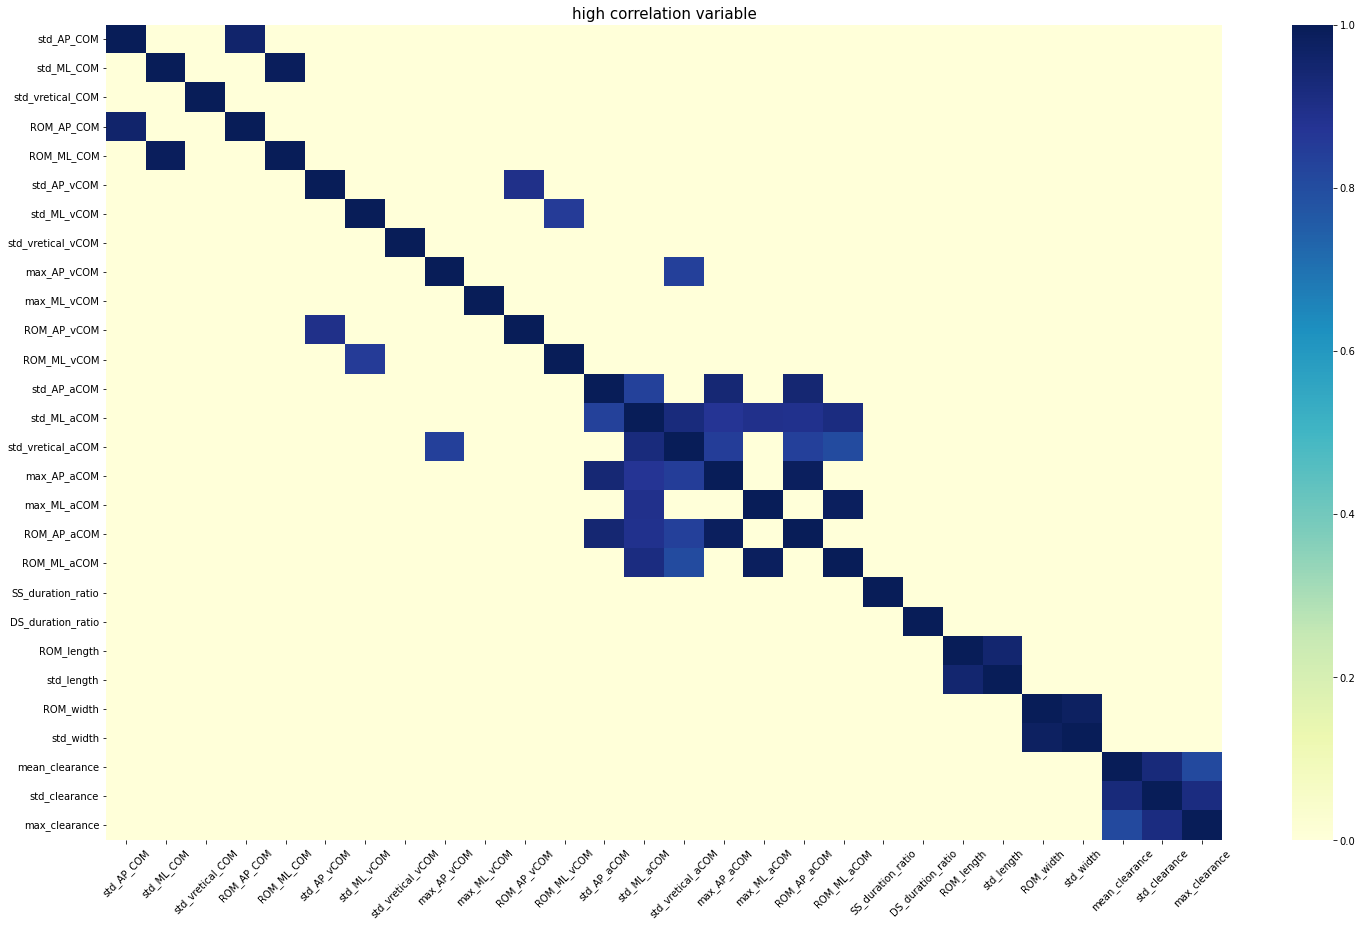

In [188]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [189]:
corr_df = COP_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

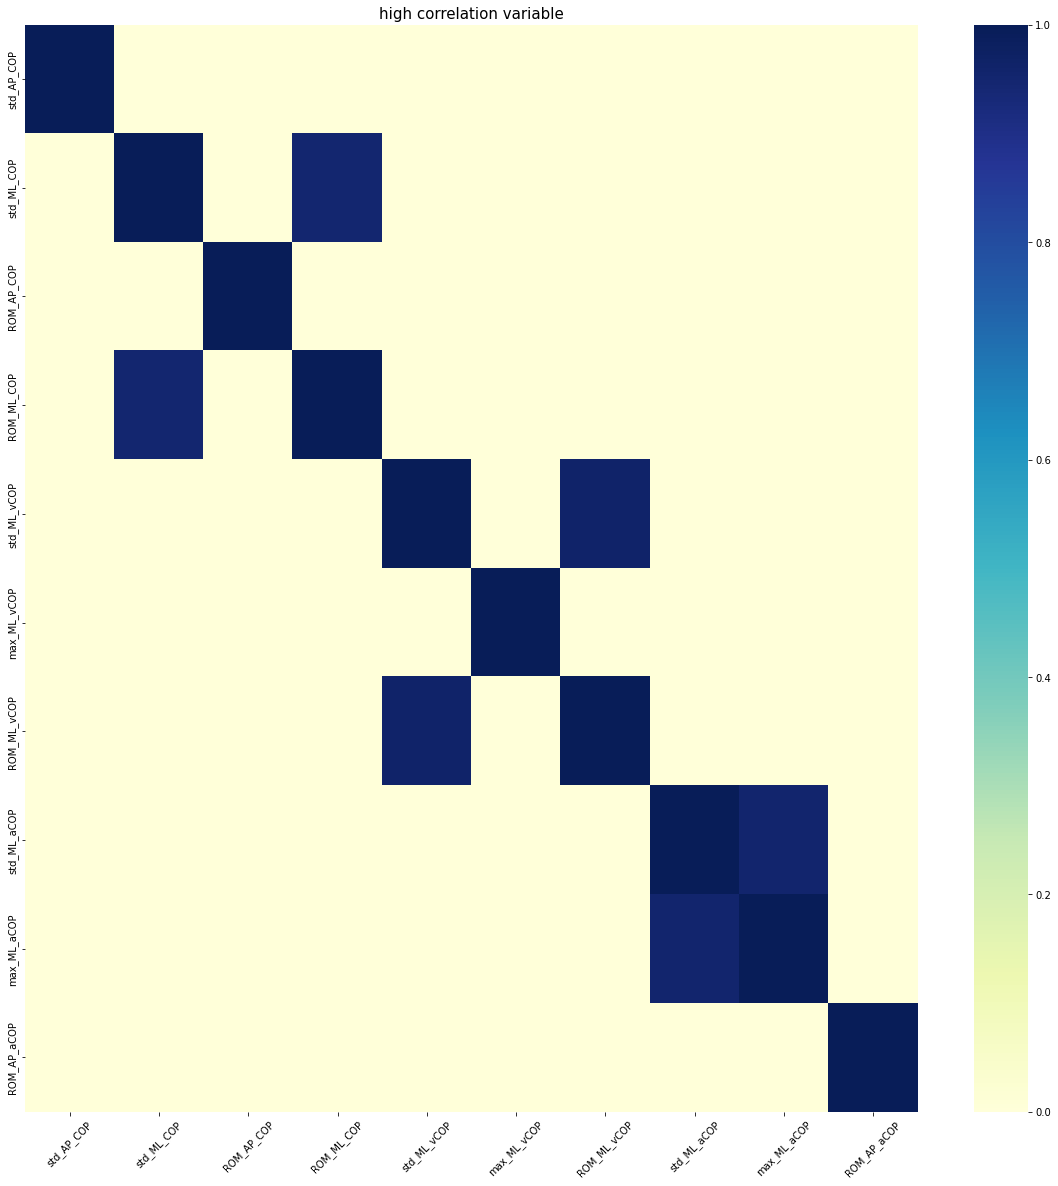

In [190]:
import seaborn as sns

fig = plt.figure(figsize = (20,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [191]:
corr_df = advanced_clear_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

Text(0.5, 1.0, 'high correlation variable')

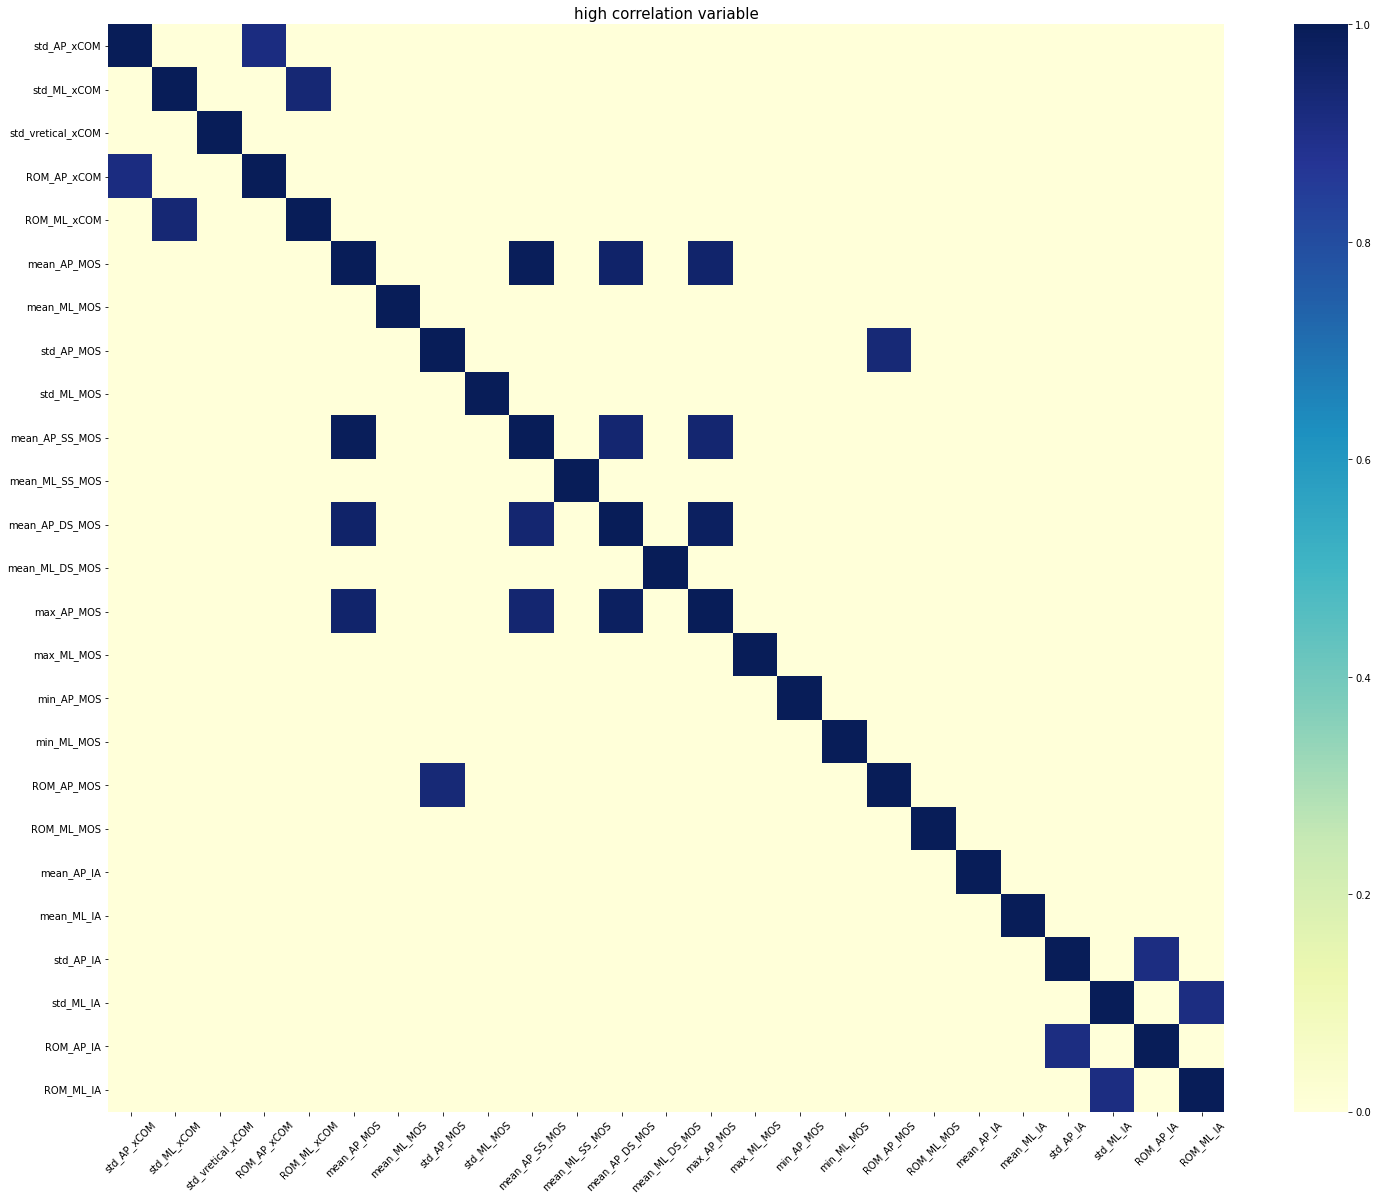

In [192]:
import seaborn as sns

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

In [526]:
all_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']]

spatiotemporal_clear_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'target_performance'
       ]]

COP_clear_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'target_performance'
       ]]

advanced_clear_corr_df = df_without_outlier[['std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA',
       'target_performance'
       ]]
spa_cop_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP','target_performance'
       ]]
spa_adv_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA', 'target_performance'
       ]]
cop_adv_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance'
       ]]
kinematic_corr_df = df_without_outlier[['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS','target_performance']]
non_kinematic_corr_df = df_without_outlier[['std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'target_performance'
       ]]

Text(0.5, 1.0, 'high correlation variable')

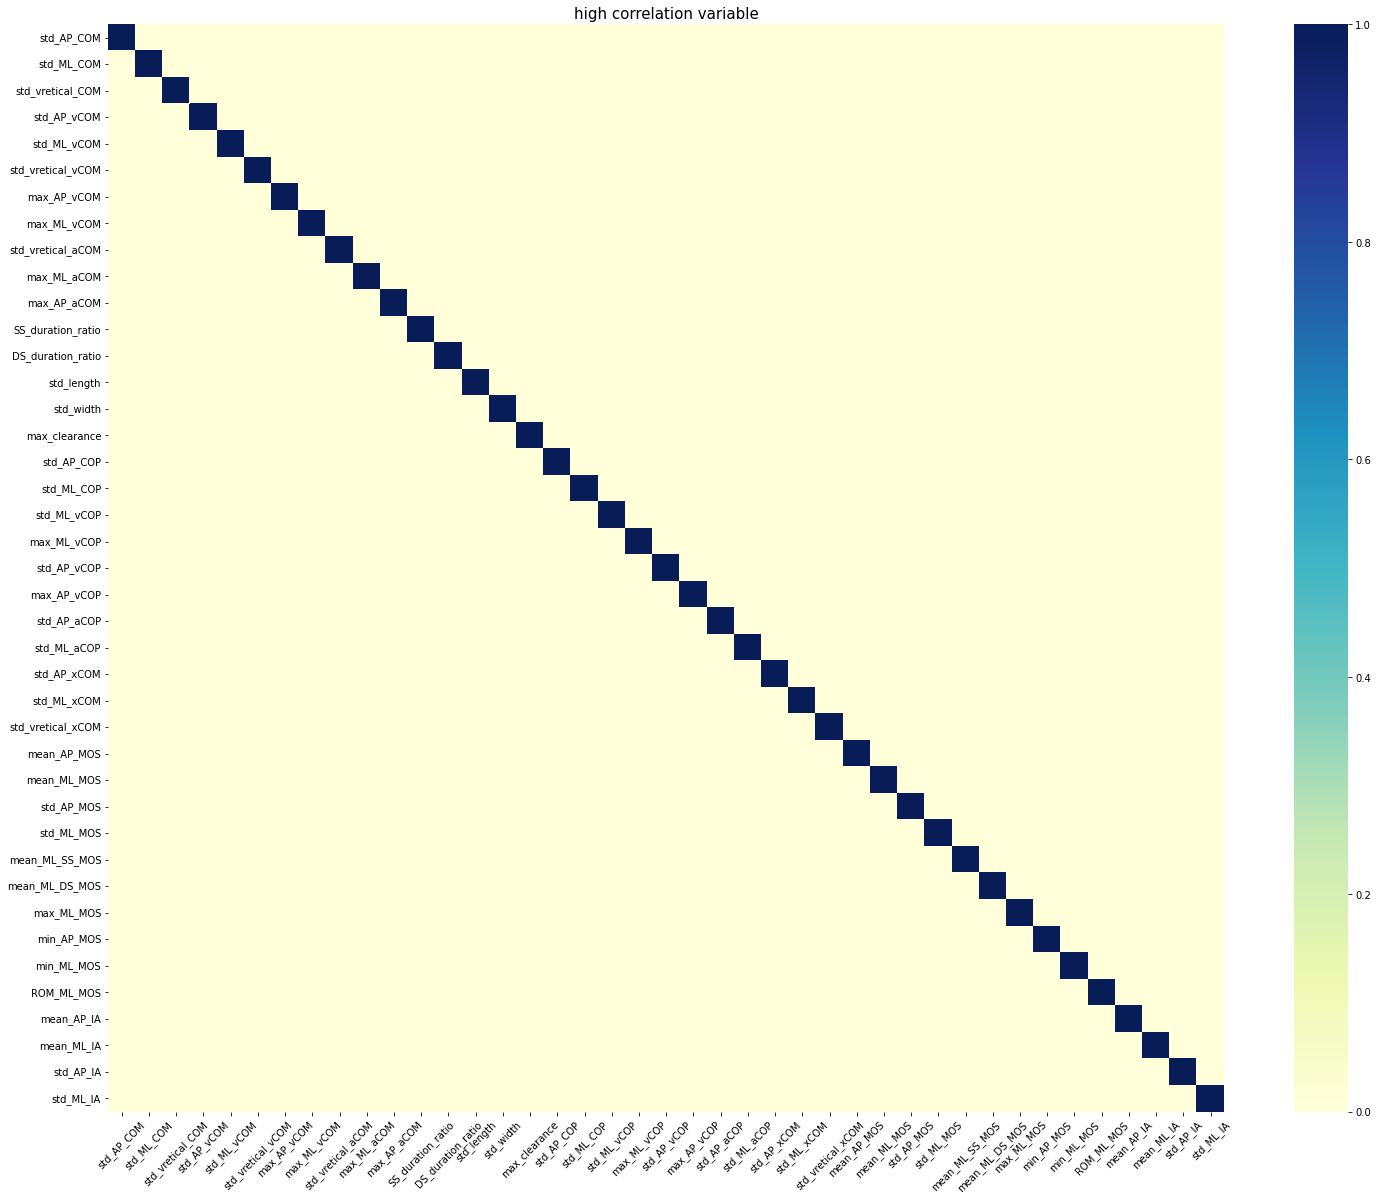

In [401]:
corr_df = all_clear_corr_df.corr()
high_corr_df = corr_df[corr_df > 0.9].fillna(0)
mid_corr_df_1 = corr_df[corr_df < 0.9]
mid_corr_df = mid_corr_df_1[corr_df > 0.5].fillna(0)
low_corr_df = corr_df[corr_df < 0.5].fillna(0)

fig = plt.figure(figsize = (25,20))
sns.heatmap(high_corr_df, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.title('high correlation variable', fontsize = 15)

C:\Users\a1003\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'std_AP_COM'}>,
        <AxesSubplot:title={'center':'std_ML_COM'}>,
        <AxesSubplot:title={'center':'std_vretical_COM'}>,
        <AxesSubplot:title={'center':'std_AP_vCOM'}>],
       [<AxesSubplot:title={'center':'std_ML_vCOM'}>,
        <AxesSubplot:title={'center':'std_vretical_vCOM'}>,
        <AxesSubplot:title={'center':'max_AP_vCOM'}>,
        <AxesSubplot:title={'center':'max_ML_vCOM'}>],
       [<AxesSubplot:title={'center':'std_vretical_aCOM'}>,
        <AxesSubplot:title={'center':'max_ML_aCOM'}>,
        <AxesSubplot:title={'center':'max_AP_aCOM'}>,
        <AxesSubplot:title={'center':'SS_duration_ratio'}>],
       [<AxesSubplot:title={'center':'DS_duration_ratio'}>,
        <AxesSubplot:title={'center':'std_length'}>,
        <AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'max_clearance'}>]], dtype=object)

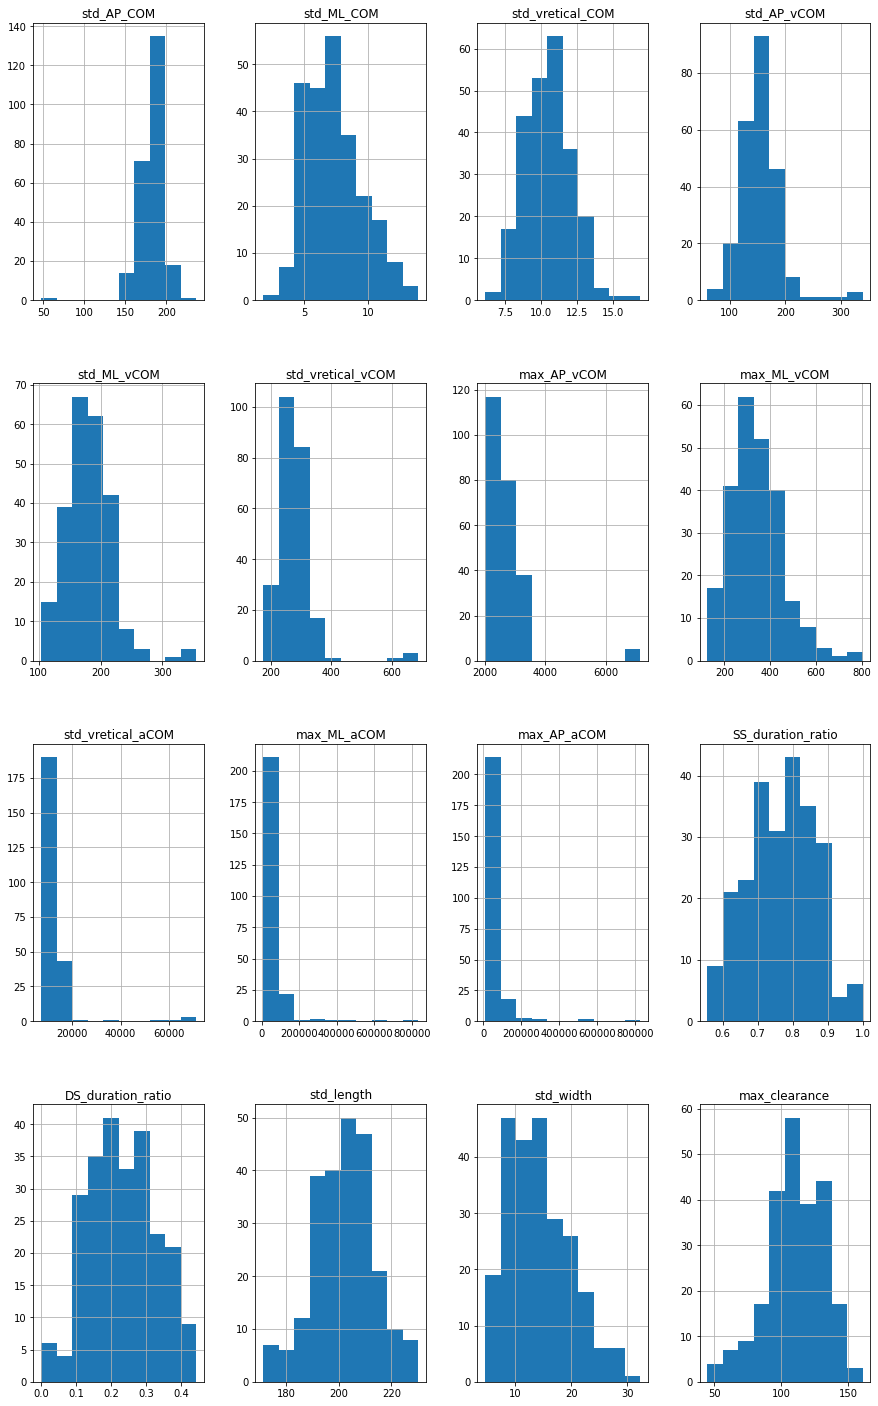

In [195]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
spatiotemporal_clear_corr_df.hist(ax = ax)

In [196]:
spatiotemporal_clear_corr_df.groupby("target_performance").describe().SS_duration_ratio

count      mean       std      min       25%       50%  \
target_performance                                                           
Bad                  60.0  0.795021  0.090203  0.64706  0.725618  0.777295   
Good                 75.0  0.756755  0.095380  0.57895  0.666670  0.769910   
Moderate            105.0  0.758519  0.098414  0.55556  0.684210  0.771430   

                         75%      max  
target_performance                     
Bad                 0.854908  1.00000  
Good                0.827255  0.97030  
Moderate            0.836360  0.94444

## Data processing

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [198]:
scaler = StandardScaler()
desired_dataset = all_clear_corr_df

In [199]:
input_df = desired_dataset.iloc[:,0:-1]
target_df = desired_dataset["target_performance"]

In [200]:
inputs = scaler.fit_transform(input_df)
targets = np.array(target_df)

In [201]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [202]:
x_train.shape

(168, 41)

In [203]:
[uni_name, count] = np.unique(y_train, return_counts=True)
print("Training dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Training dataset: 
Bad 45
Good 53
Moderate 70


In [204]:
[uni_name, count] = np.unique(y_test, return_counts=True)
print("Testing dataset: " + "\n" + uni_name[0] + " "  + str(count[0]) + "\n" + uni_name[1] + " "  + str(count[1]) + "\n" + uni_name[2] + " "  + str(count[2]) )

Testing dataset: 
Bad 15
Good 22
Moderate 35


In [532]:
a = ['std_AP_COM', 'std_ML_COM', 'std_vretical_COM', 'std_AP_vCOM', 'std_ML_vCOM', 'std_vretical_vCOM',
       'max_AP_vCOM', 'max_ML_vCOM', 'std_vretical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance', 'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP', 'max_AP_vCOP',
        'std_AP_aCOP','std_ML_aCOP', 'std_AP_xCOM', 'std_ML_xCOM', 'std_vretical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS', 'std_AP_MOS', 'std_ML_MOS',
       'mean_ML_SS_MOS', 'mean_ML_DS_MOS', 'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA','target_performance']
spa_para = list(range(0, 16))
cop_para = list(range(16, 24))
advanced = list(range(24, 41))
spa_cop = spa_para + cop_para
spa_adv = spa_para + advanced
cop_adv = cop_para + advanced
kine_para = spa_para + list(range(24,37))
non_kine_para = cop_para + list(range(37,41))

In [533]:
input_df.columns[37:41]

Index(['mean_AP_IA', 'mean_ML_IA', 'std_AP_IA', 'std_ML_IA'], dtype='object')

In [534]:
all_input_df = input_df
all_input_df.columns = ['std_AP_COM', 'std_ML_COM', 'std_vertical_COM', 'std_AP_vCOM',
       'std_ML_vCOM', 'std_vertical_vCOM', 'max_AP_vCOM', 'max_ML_vCOM',
       'std_vertical_aCOM', 'max_ML_aCOM', 'max_AP_aCOM', 'SS_duration_ratio',
       'DS_duration_ratio', 'std_length', 'std_width', 'max_clearance',
       'std_AP_COP', 'std_ML_COP', 'std_ML_vCOP', 'max_ML_vCOP', 'std_AP_vCOP',
       'max_AP_vCOP', 'std_AP_aCOP', 'std_ML_aCOP', 'std_AP_xCOM',
       'std_ML_xCOM', 'std_vertical_xCOM', 'mean_AP_MOS', 'mean_ML_MOS',
       'std_AP_MOS', 'std_ML_MOS', 'mean_ML_SS_MOS', 'mean_ML_DS_MOS',
       'max_ML_MOS', 'min_AP_MOS', 'min_ML_MOS', 'ROM_ML_MOS', 'mean_AP_IA',
       'mean_ML_IA', 'std_AP_IA', 'std_ML_IA']
spa_input_df = input_df.iloc[:,spa_para]
cop_input_df = input_df.iloc[:,cop_para]
adv_input_df = input_df.iloc[:,advanced]
spa_cop_input_df = input_df.iloc[:,spa_cop]
spa_adv_input_df = input_df.iloc[:,spa_adv]
cop_adv_input_df = input_df.iloc[:,cop_adv]
kine_input_df = input_df.iloc[:,kine_para]
non_kine_input_df = input_df.iloc[:,non_kine_para]

all_x_train = x_train
spa_x_train = x_train[:,spa_para]
cop_x_train = x_train[:,cop_para]
adv_x_train = x_train[:,advanced]
spa_cop_x_train = x_train[:,spa_cop]
spa_adv_x_train = x_train[:,spa_adv]
cop_adv_x_train = x_train[:,cop_adv]
kine_x_train = x_train[:,kine_para]
non_kine_x_train = x_train[:,non_kine_para]

all_x_test = x_test
spa_x_test = x_test[:,spa_para]
cop_x_test = x_test[:,cop_para]
adv_x_test = x_test[:,advanced]
spa_cop_x_test = x_test[:,spa_cop]
spa_adv_x_test = x_test[:,spa_adv]
cop_adv_x_test = x_test[:,cop_adv]
kine_x_test = x_test[:,kine_para]
non_kine_x_test = x_test[:,non_kine_para]

In [423]:
cop_adv_x_train.shape

(168, 25)

## Model training

In [207]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

SVC_reg = SVC()
DT_reg = DecisionTreeClassifier()
Log_reg = LogisticRegression()
RF_reg = RandomForestClassifier()

In [208]:
from sklearn.model_selection import GridSearchCV

SVC_para = {
    "C":[1,1.2,2,2.5,3],
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "degree":[2,3,4,5],
    "probability":[True]
}

DT_para = {
    "criterion": ["gini", "entropy"],
    'max_depth': [1,2,3,4,5], 
    'max_leaf_nodes': [8,9,10,15]
}

Log_para = {
    "penalty": ['l2', 'none'],
    "C":[1,1.2,2,2.5,3],
    "max_iter":[200, 300, 400],
    "solver":['lbfgs']
}

RF_para = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [1,2,3], 
    'max_leaf_nodes': [8,9,10,15], 
    'n_estimators': [ 100, 200, 300]
}


### All features

In [209]:
all_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
all_SVC_grid_search.fit(all_x_train, y_train.ravel())
all_SVC_grid_search.best_params_

{'C': 1.2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [210]:
all_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
all_DT_grid_search.fit(all_x_train, y_train)
all_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 15}

In [211]:
all_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
all_RF_grid_search.fit(all_x_train, y_train)
all_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [212]:
all_SVC_best_reg = all_SVC_grid_search.best_estimator_
all_DT_best_reg = all_DT_grid_search.best_estimator_
all_RF_best_reg = all_RF_grid_search.best_estimator_

In [213]:
all_SVC_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

In [214]:
all_DT_best_reg.score(all_x_test, y_test.ravel())

0.8888888888888888

In [215]:
all_RF_best_reg.score(all_x_test, y_test.ravel())

0.8333333333333334

[Text(1008.3857142857144, 2092.8599999999997, 'std_vertical_xCOM <= -0.685\nentropy = 1.56\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(366.6857142857143, 1712.34, 'max_clearance <= 0.025\nentropy = 0.847\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(183.34285714285716, 1331.82, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0, 0]\nclass = Good'),
 Text(550.0285714285715, 1331.82, 'std_ML_IA <= 1.032\nentropy = 0.998\nsamples = 36\nvalue = [19, 17, 0]\nclass = Good'),
 Text(366.6857142857143, 951.3, 'min_ML_MOS <= -0.531\nentropy = 0.871\nsamples = 24\nvalue = [7, 17, 0]\nclass = Moderate'),
 Text(183.34285714285716, 570.78, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(550.0285714285715, 570.78, 'std_ML_MOS <= -0.893\nentropy = 0.61\nsamples = 20\nvalue = [3, 17, 0]\nclass = Moderate'),
 Text(366.6857142857143, 190.26000000000022, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(733.3714285714286, 190.26000000000022, '

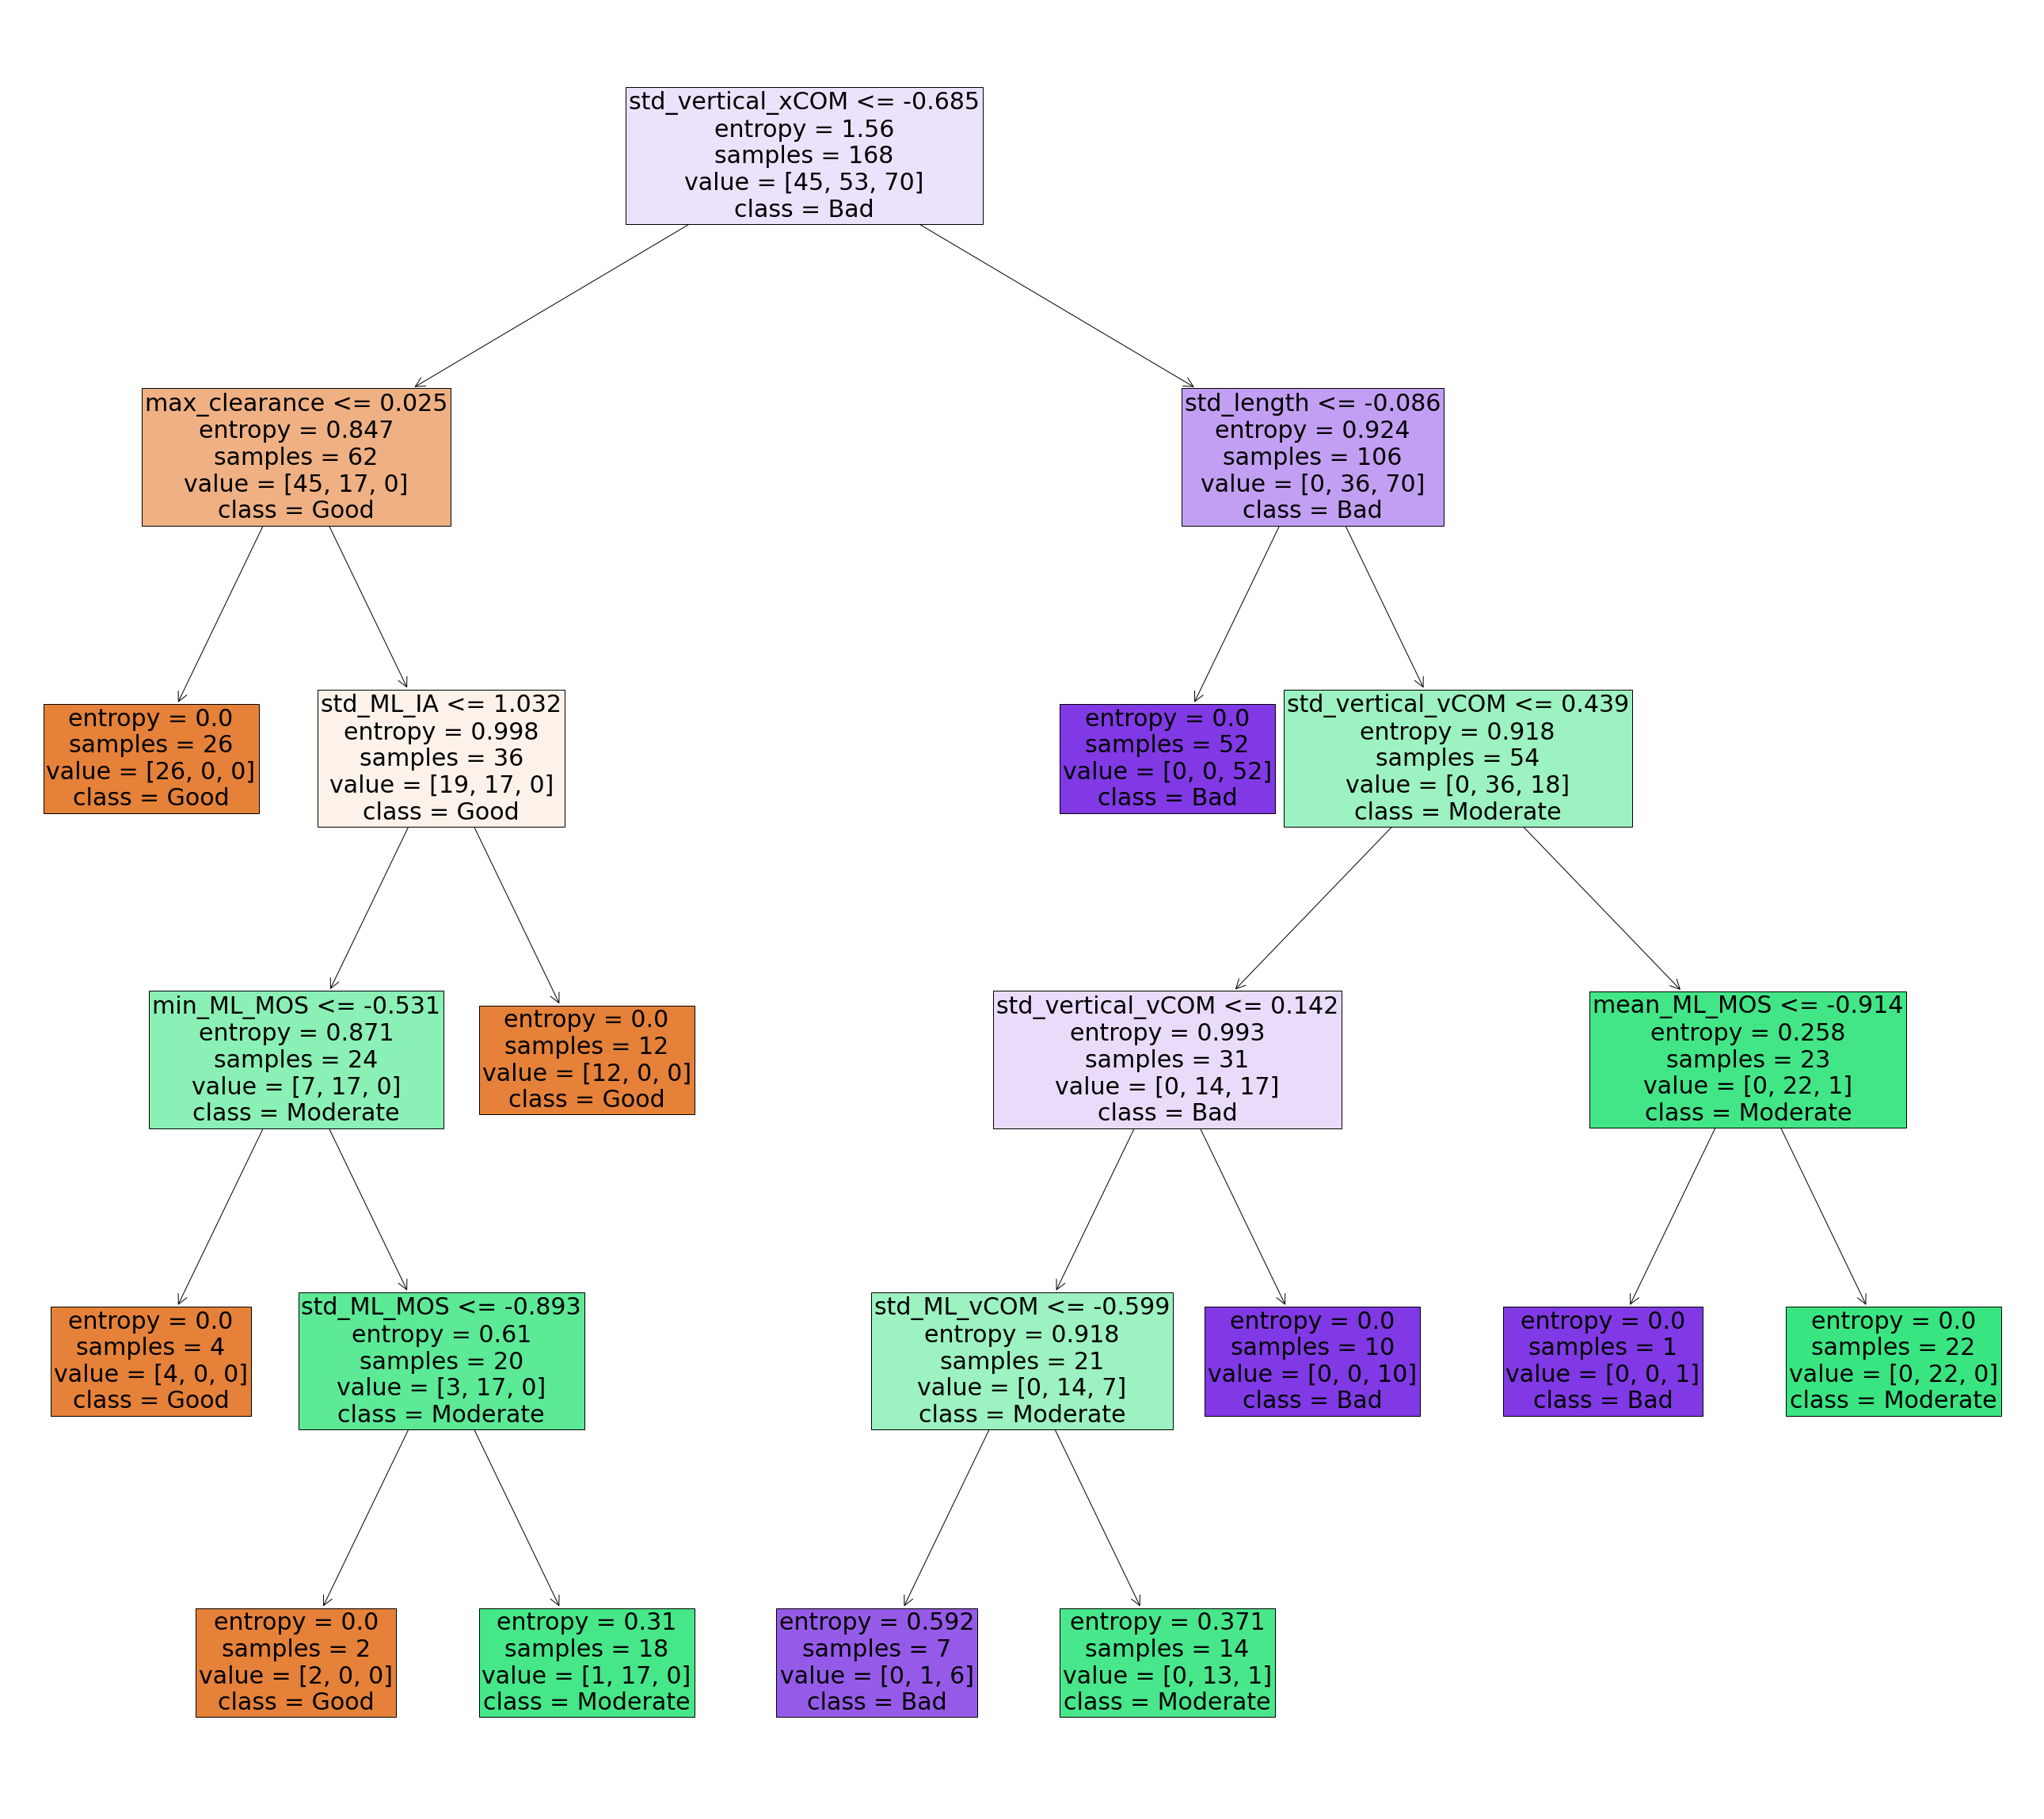

In [525]:
from sklearn import  tree
figure = plt.figure(figsize = (46,42))
tree.plot_tree(all_DT_best_reg, 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
               fontsize=30, 
              filled=True)

[Text(837.0, 1189.125, 'std_AP_xCOM <= 0.128\ngini = 0.636\nsamples = 107\nvalue = [46, 42, 80]\nclass = Bad'),
 Text(418.5, 849.375, 'std_vertical_xCOM <= -0.629\ngini = 0.457\nsamples = 57\nvalue = [17, 8, 59]\nclass = Bad'),
 Text(209.25, 509.625, 'std_ML_COP <= -1.708\ngini = 0.105\nsamples = 12\nvalue = [17, 1, 0]\nclass = Good'),
 Text(104.625, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(313.875, 169.875, 'gini = 0.0\nsamples = 11\nvalue = [17, 0, 0]\nclass = Good'),
 Text(627.75, 509.625, 'std_length <= 0.429\ngini = 0.19\nsamples = 45\nvalue = [0, 7, 59]\nclass = Bad'),
 Text(523.125, 169.875, 'gini = 0.094\nsamples = 40\nvalue = [0, 3, 58]\nclass = Bad'),
 Text(732.375, 169.875, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]\nclass = Moderate'),
 Text(1255.5, 849.375, 'std_ML_aCOP <= -0.374\ngini = 0.654\nsamples = 50\nvalue = [29, 34, 21]\nclass = Moderate'),
 Text(1046.25, 509.625, 'min_ML_MOS <= 0.048\ngini = 0.494\nsamples = 15\nvalue = [0

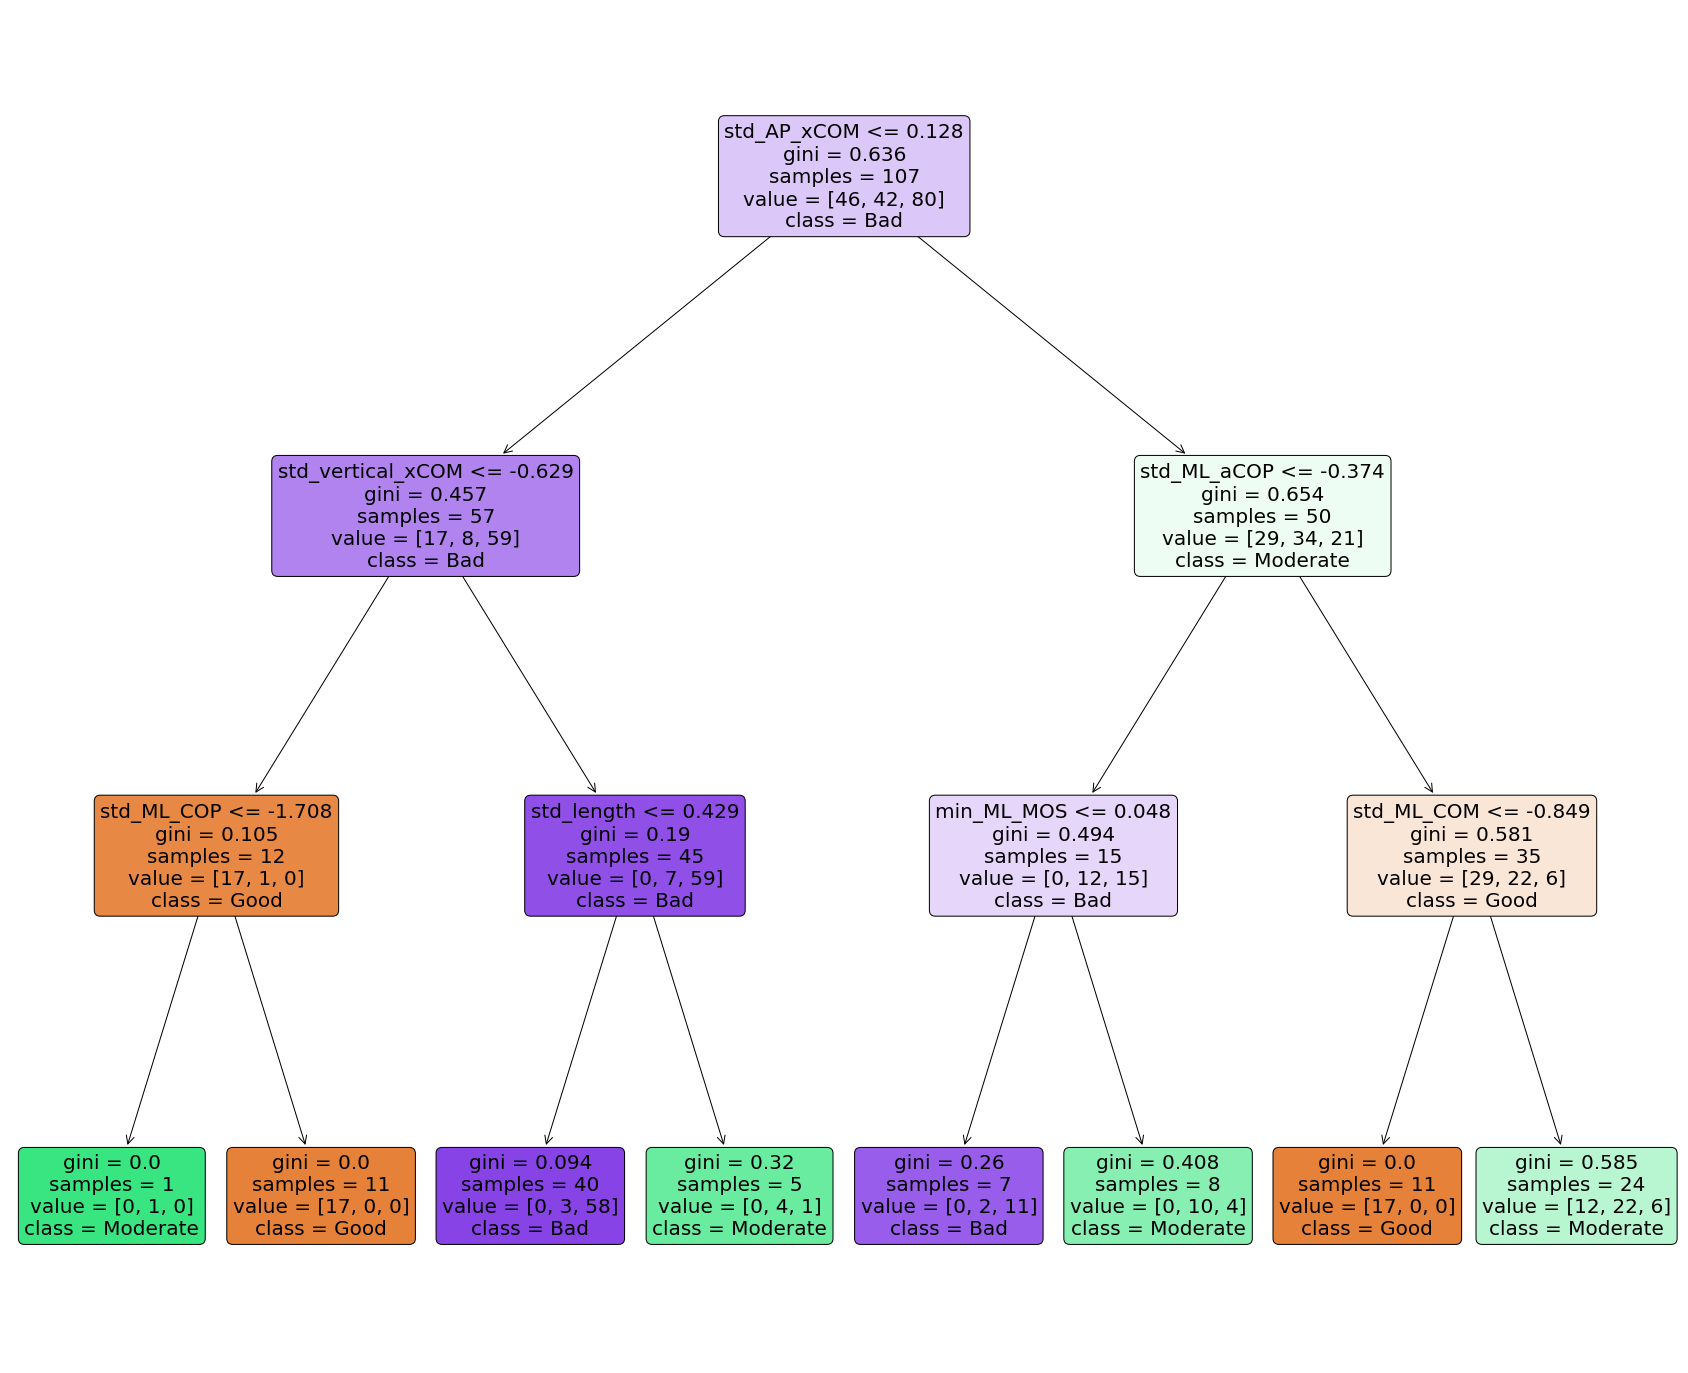

In [581]:
figure = plt.figure(figsize = (30,25))
tree.plot_tree(all_RF_best_reg.estimators_[0], 
              feature_names=list(all_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              fontsize=20, 
              rounded=True)


In [218]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [219]:
acc_3_t = accuracy_score(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all SVC
acc: 0.833
recall: 0.81
precision: 0.816


Text(0.5, 1.0, 'SVC confusion matrix')

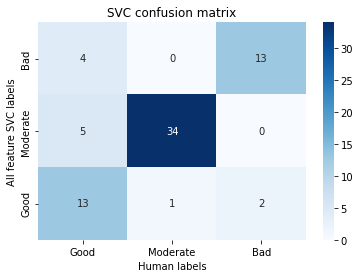

In [220]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_SVC_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [221]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature SVC Sensitivity: 
 Good prediction: 59.09090909090909 
 Moderate prediction 97.14285714285714 
 Bad prediction 86.66666666666667


In [222]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature SVC Precision: 
 Good prediction: 81.25 
 Moderate prediction 87.17948717948718 
 Bad prediction 76.47058823529412


In [223]:
acc_3_t = accuracy_score(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all DT
acc: 0.889
recall: 0.863
precision: 0.873


Text(0.5, 1.0, 'DT confusion matrix')

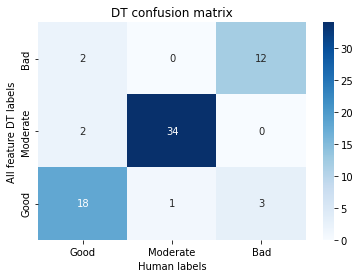

In [224]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_DT_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [225]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature DT Sensitivity: 
 Good prediction: 81.81818181818183 
 Moderate prediction 97.14285714285714 
 Bad prediction 80.0


In [226]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature DT Precision: 
 Good prediction: 81.81818181818183 
 Moderate prediction 94.44444444444444 
 Bad prediction 85.71428571428571


In [227]:
acc_3_t = accuracy_score(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("all RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

all RF
acc: 0.833
recall: 0.818
precision: 0.85


Text(0.5, 1.0, 'RF confusion matrix')

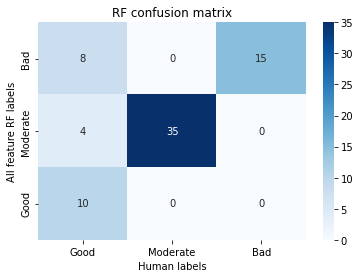

In [228]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), all_RF_best_reg.predict(all_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('All feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [229]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("All feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

All feature RF Sensitivity: 
 Good prediction: 45.45454545454545 
 Moderate prediction 100.0 
 Bad prediction 100.0


In [230]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("All feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


All feature RF Precision: 
 Good prediction: 100.0 
 Moderate prediction 89.74358974358975 
 Bad prediction 65.21739130434783


### spatiotemporal features

In [231]:
spa_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_SVC_grid_search.fit(spa_x_train, y_train.ravel())
spa_SVC_grid_search.best_params_

{'C': 2.5, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [232]:
spa_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_DT_grid_search.fit(spa_x_train, y_train)
spa_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9}

In [233]:
spa_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_RF_grid_search.fit(spa_x_train, y_train)
spa_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [234]:
spa_SVC_best_reg = spa_SVC_grid_search.best_estimator_
spa_DT_best_reg =spa_DT_grid_search.best_estimator_
spa_RF_best_reg = spa_RF_grid_search.best_estimator_

In [235]:
spa_SVC_best_reg.score(spa_x_test, y_test.ravel())

0.7777777777777778

In [236]:
spa_DT_best_reg.score(spa_x_test, y_test.ravel())

0.7916666666666666

In [237]:
spa_RF_best_reg.score(spa_x_test, y_test.ravel())

0.8055555555555556

[Text(472.15384615384613, 978.48, 'max_AP_aCOM <= -0.219\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(171.69230769230768, 761.0400000000001, 'std_length <= -0.086\ngini = 0.395\nsamples = 85\nvalue = [2, 20, 63]\nclass = Bad'),
 Text(85.84615384615384, 543.6, 'gini = 0.0\nsamples = 45\nvalue = [0, 0, 45]\nclass = Bad'),
 Text(257.53846153846155, 543.6, 'std_AP_vCOM <= 0.468\ngini = 0.545\nsamples = 40\nvalue = [2, 20, 18]\nclass = Moderate'),
 Text(171.69230769230768, 326.1600000000001, 'std_vretical_vCOM <= 0.504\ngini = 0.533\nsamples = 29\nvalue = [2, 10, 17]\nclass = Bad'),
 Text(85.84615384615384, 108.72000000000003, 'gini = 0.43\nsamples = 22\nvalue = [2, 4, 16]\nclass = Bad'),
 Text(257.53846153846155, 108.72000000000003, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Moderate'),
 Text(343.38461538461536, 326.1600000000001, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]\nclass = Moderate'),
 Text(772.6153846153845, 761.0400000000001, 'std_len

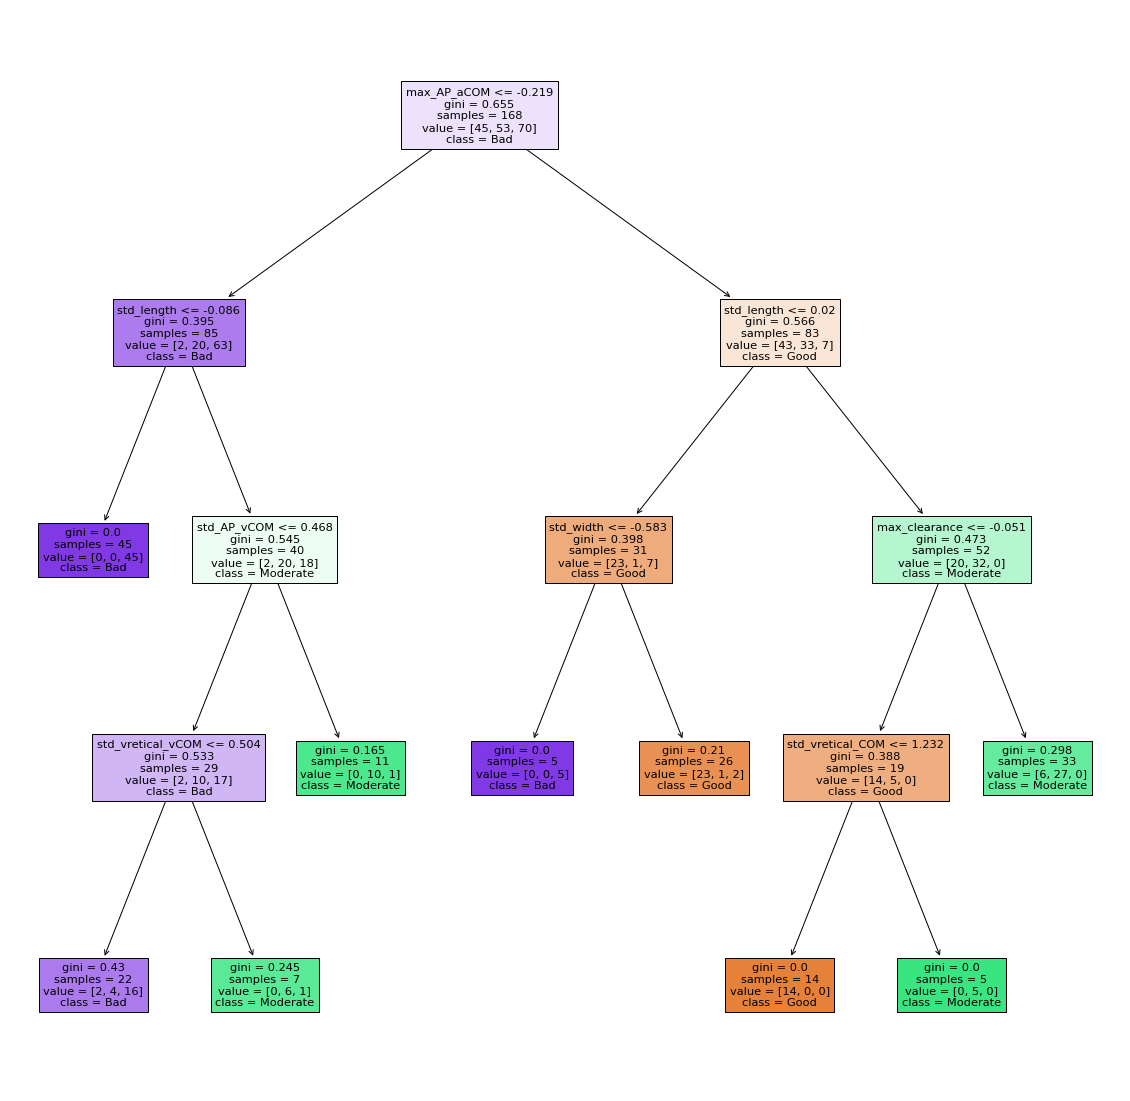

In [238]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_DT_best_reg, 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(604.5, 951.3000000000001, 'max_ML_aCOM <= -0.296\nentropy = 1.529\nsamples = 109\nvalue = [36, 59, 73]\nclass = Bad'),
 Text(372.0, 679.5, 'std_length <= 0.129\nentropy = 0.971\nsamples = 53\nvalue = [1, 25, 57]\nclass = Bad'),
 Text(186.0, 407.70000000000005, 'std_vretical_COM <= 0.778\nentropy = 0.377\nsamples = 32\nvalue = [1, 2, 48]\nclass = Bad'),
 Text(93.0, 135.89999999999998, 'entropy = 0.144\nsamples = 30\nvalue = [1, 0, 48]\nclass = Bad'),
 Text(279.0, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Moderate'),
 Text(558.0, 407.70000000000005, 'max_clearance <= -0.172\nentropy = 0.857\nsamples = 21\nvalue = [0, 23, 9]\nclass = Moderate'),
 Text(465.0, 135.89999999999998, 'entropy = 0.592\nsamples = 5\nvalue = [0, 1, 6]\nclass = Bad'),
 Text(651.0, 135.89999999999998, 'entropy = 0.529\nsamples = 16\nvalue = [0, 22, 3]\nclass = Moderate'),
 Text(837.0, 679.5, 'SS_duration_ratio <= -0.912\nentropy = 1.509\nsamples = 56\nvalue = [35, 34, 16]\ncla

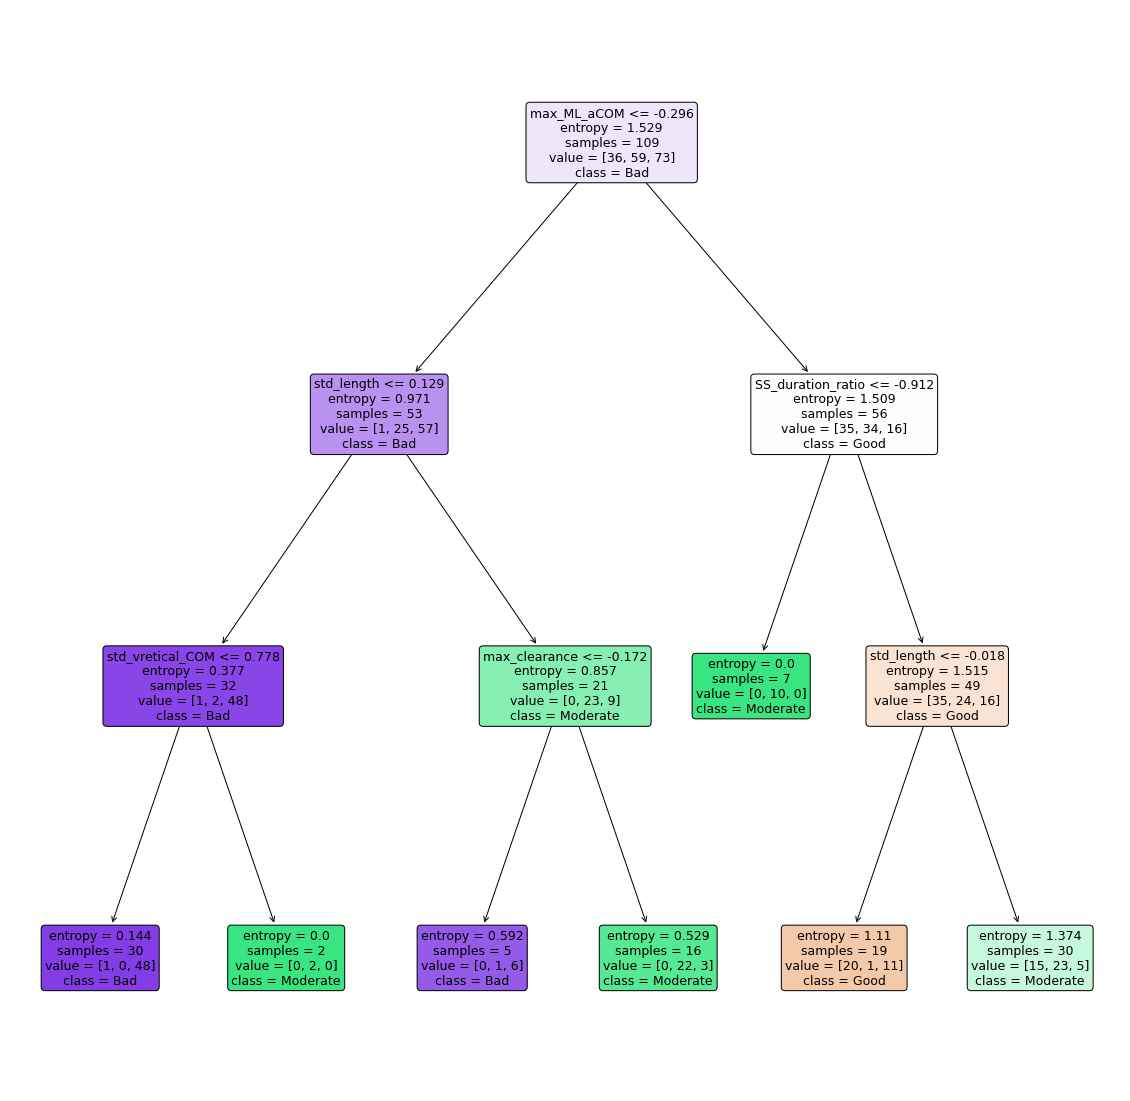

In [239]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_RF_best_reg.estimators_[0], 
              feature_names=list(spa_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [240]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [241]:
acc_3_t = accuracy_score(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal SVC" + "\n" + "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal SVC
acc: 0.778
recall: 0.707
precision: 0.734


Text(0.5, 1.0, 'SVC confusion matrix')

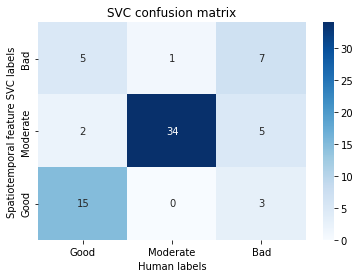

In [242]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_SVC_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [243]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature SVC Sensitivity: 
 Good prediction: 68.18181818181817 
 Moderate prediction 97.14285714285714 
 Bad prediction 46.666666666666664


In [244]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature SVC Precision: 
 Good prediction: 83.33333333333334 
 Moderate prediction 82.92682926829268 
 Bad prediction 53.84615384615385


In [245]:
acc_3_t = accuracy_score(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal DT
acc: 0.792
recall: 0.733
precision: 0.762


Text(0.5, 1.0, 'DT confusion matrix')

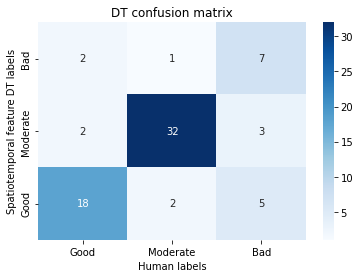

In [246]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_DT_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [247]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature DT Sensitivity: 
 Good prediction: 81.81818181818183 
 Moderate prediction 91.42857142857143 
 Bad prediction 46.666666666666664


In [248]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature DT Precision: 
 Good prediction: 72.0 
 Moderate prediction 86.48648648648648 
 Bad prediction 70.0


In [249]:
acc_3_t = accuracy_score(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spatiotemporal RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spatiotemporal RF
acc: 0.806
recall: 0.757
precision: 0.808


Text(0.5, 1.0, 'RF confusion matrix')

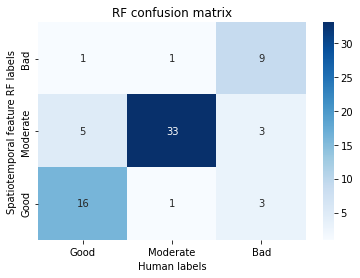

In [250]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_RF_best_reg.predict(spa_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Spatiotemporal feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [251]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Spatiotemporal feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Spatiotemporal feature RF Sensitivity: 
 Good prediction: 72.72727272727273 
 Moderate prediction 94.28571428571428 
 Bad prediction 60.0


In [252]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Spatiotemporal feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Spatiotemporal feature RF Precision: 
 Good prediction: 80.0 
 Moderate prediction 80.48780487804879 
 Bad prediction 81.81818181818183


### cop features

In [253]:
COP_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
COP_SVC_grid_search.fit(cop_x_train, y_train.ravel())
COP_SVC_grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [254]:
COP_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
COP_DT_grid_search.fit(cop_x_train, y_train)
COP_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8}

In [255]:
COP_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
COP_RF_grid_search.fit(cop_x_train, y_train)
COP_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 300}

In [256]:
COP_SVC_best_reg = COP_SVC_grid_search.best_estimator_
COP_DT_best_reg = COP_DT_grid_search.best_estimator_
COP_RF_best_reg = COP_RF_grid_search.best_estimator_

In [257]:
COP_SVC_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [258]:
COP_DT_best_reg.score(cop_x_test, y_test.ravel())

0.6111111111111112

In [259]:
COP_RF_best_reg.score(cop_x_test, y_test.ravel())

0.6666666666666666

[Text(608.7272727272727, 978.48, 'std_AP_aCOP <= -0.185\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(405.8181818181818, 761.0400000000001, 'std_AP_COP <= -1.033\ngini = 0.519\nsamples = 93\nvalue = [8, 27, 58]\nclass = Bad'),
 Text(304.3636363636364, 543.6, 'std_ML_COP <= -0.529\ngini = 0.586\nsamples = 16\nvalue = [4, 9, 3]\nclass = Moderate'),
 Text(202.9090909090909, 326.1600000000001, 'std_ML_COP <= -1.738\ngini = 0.5\nsamples = 14\nvalue = [4, 9, 1]\nclass = Moderate'),
 Text(101.45454545454545, 108.72000000000003, 'gini = 0.571\nsamples = 7\nvalue = [4, 2, 1]\nclass = Good'),
 Text(304.3636363636364, 108.72000000000003, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(405.8181818181818, 326.1600000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Bad'),
 Text(507.27272727272725, 543.6, 'gini = 0.432\nsamples = 77\nvalue = [4, 18, 55]\nclass = Bad'),
 Text(811.6363636363636, 761.0400000000001, 'std_AP_vCOP <= -0.158\ngin

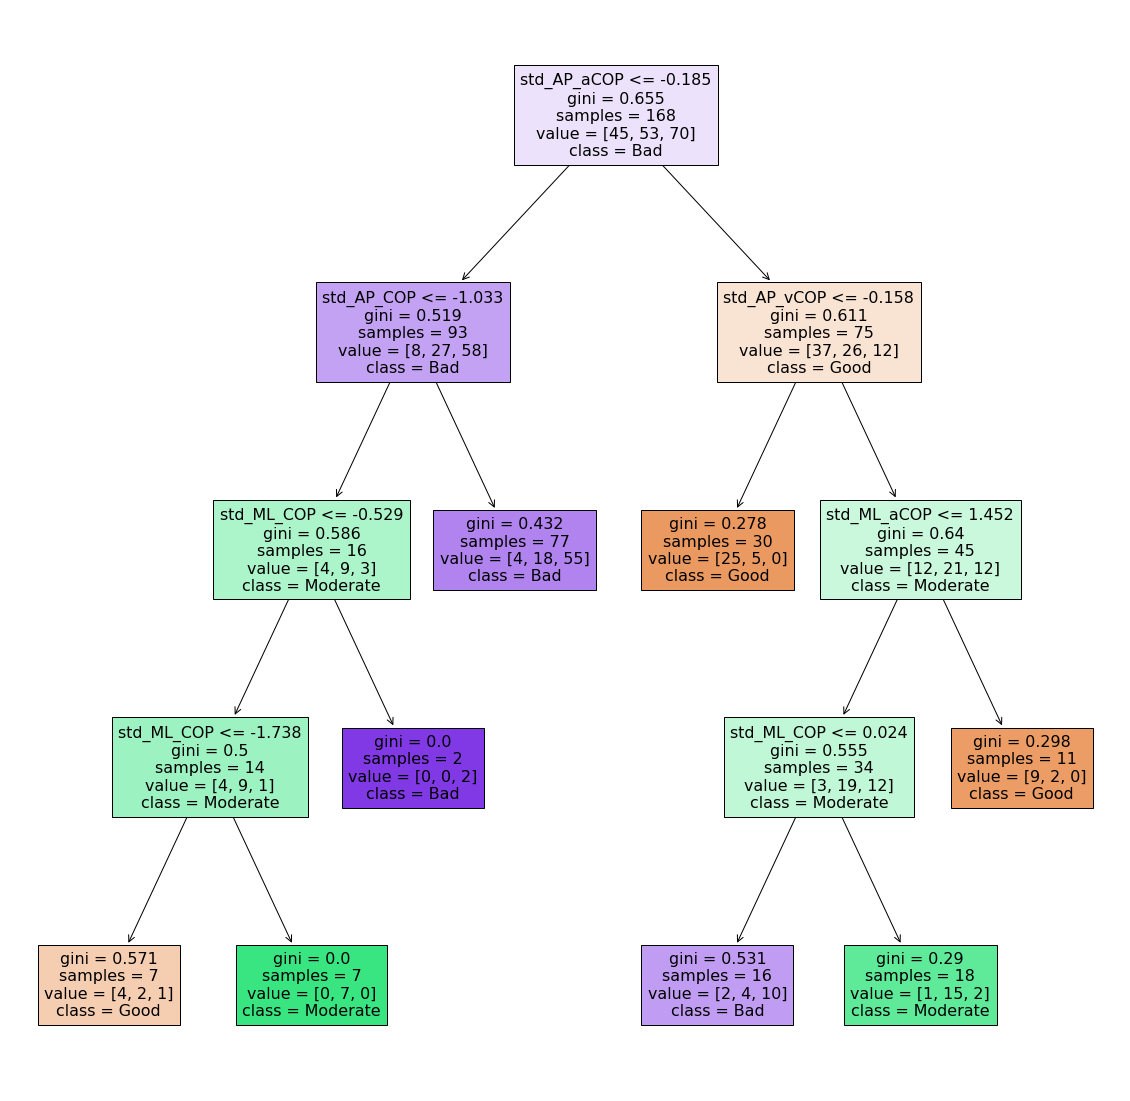

In [260]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_DT_best_reg, 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_ML_COP <= 1.109\nentropy = 1.524\nsamples = 104\nvalue = [35, 60, 73]\nclass = Bad'),
 Text(279.0, 679.5, 'max_ML_vCOP <= 0.742\nentropy = 1.461\nsamples = 90\nvalue = [23, 57, 69]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_ML_aCOP <= -0.381\nentropy = 1.473\nsamples = 81\nvalue = [23, 47, 65]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 1.199\nsamples = 50\nvalue = [6, 25, 55]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 1.516\nsamples = 31\nvalue = [17, 22, 10]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'max_AP_vCOP <= 4.727\nentropy = 0.863\nsamples = 9\nvalue = [0, 10, 4]\nclass = Moderate'),
 Text(348.75, 135.89999999999998, 'entropy = 0.779\nsamples = 8\nvalue = [0, 10, 3]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Bad'),
 Text(837.0, 679.5, 'std_ML_vCOP <= 1.443\nentropy = 1.312\nsamples = 14\nvalue = [12, 3, 4]\nclass = Go

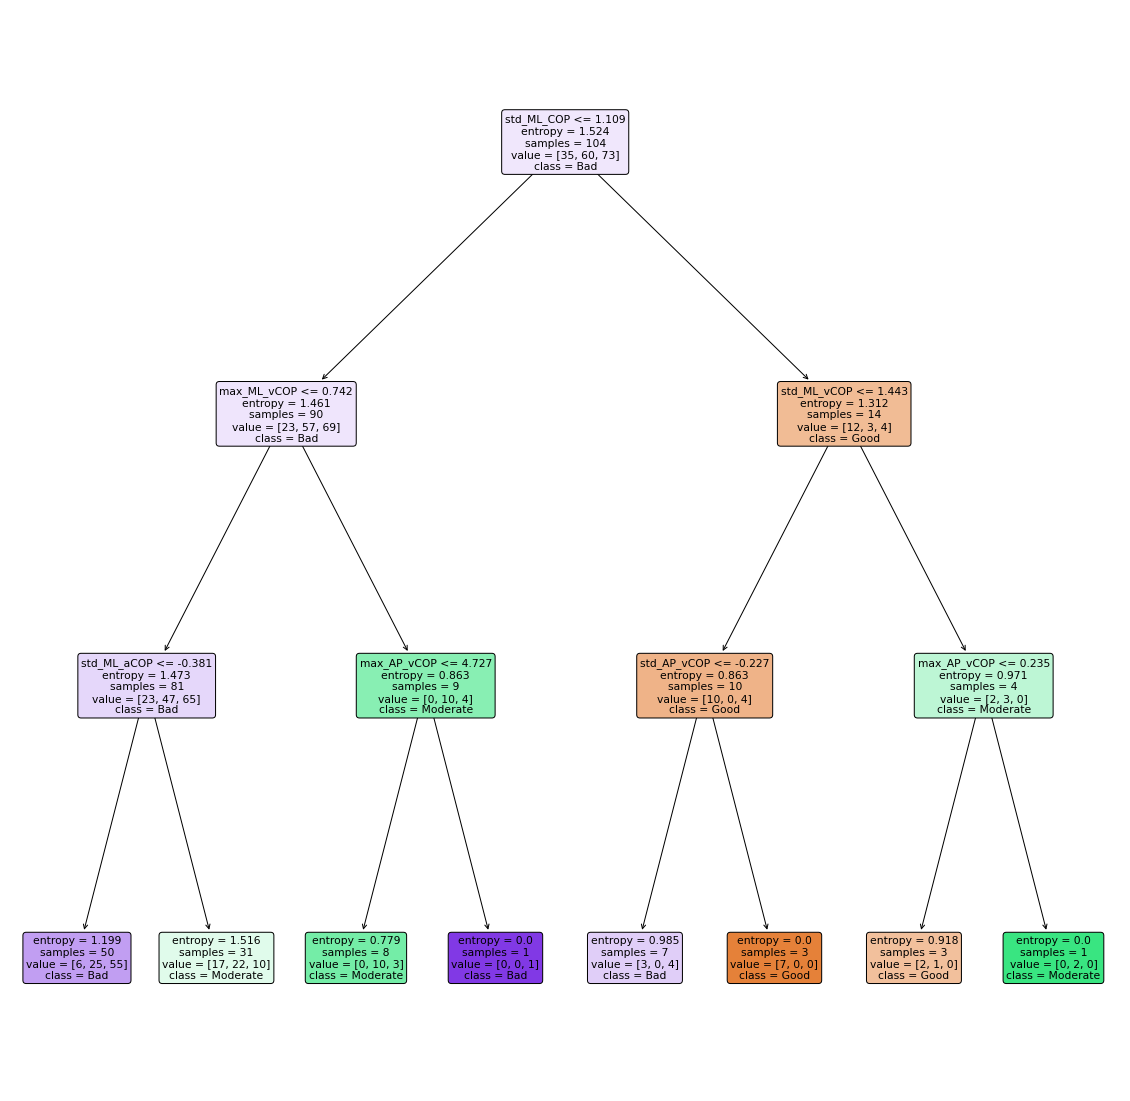

In [261]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(COP_RF_best_reg.estimators_[0], 
              feature_names=list(cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [262]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [263]:
acc_3_t = accuracy_score(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates SVC
acc: 0.611
recall: 0.523
precision: 0.535


Text(0.5, 1.0, 'SVC confusion matrix')

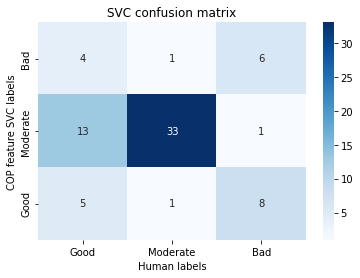

In [264]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_SVC_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [265]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature SVC Sensitivity: 
 Good prediction: 22.727272727272727 
 Moderate prediction 94.28571428571428 
 Bad prediction 40.0


In [266]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature SVC Precision: 
 Good prediction: 35.714285714285715 
 Moderate prediction 70.2127659574468 
 Bad prediction 54.54545454545454


In [267]:
acc_3_t = accuracy_score(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates DT
acc: 0.611
recall: 0.573
precision: 0.565


Text(0.5, 1.0, 'DT confusion matrix')

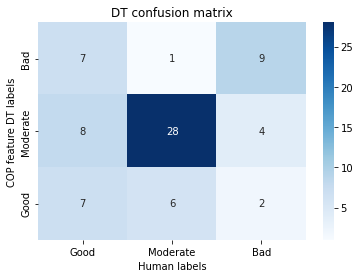

In [268]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_DT_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [269]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature DT Sensitivity: 
 Good prediction: 31.818181818181817 
 Moderate prediction 80.0 
 Bad prediction 60.0


In [270]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature DT Precision: 
 Good prediction: 46.666666666666664 
 Moderate prediction 70.0 
 Bad prediction 52.94117647058824


In [271]:
acc_3_t = accuracy_score(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("forceplates RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

forceplates RF
acc: 0.667
recall: 0.642
precision: 0.64


Text(0.5, 1.0, 'RF confusion matrix')

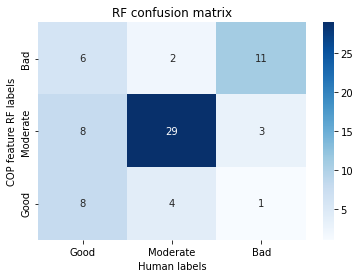

In [272]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), COP_RF_best_reg.predict(cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('COP feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [273]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("COP feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

COP feature RF Sensitivity: 
 Good prediction: 36.36363636363637 
 Moderate prediction 82.85714285714286 
 Bad prediction 73.33333333333333


In [274]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("COP feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


COP feature RF Precision: 
 Good prediction: 61.53846153846154 
 Moderate prediction 72.5 
 Bad prediction 57.89473684210527


### advanced features

In [275]:
adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
adv_SVC_grid_search.fit(adv_x_train, y_train.ravel())
adv_SVC_grid_search.best_params_

{'C': 2, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [276]:
adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
adv_DT_grid_search.fit(adv_x_train, y_train)
adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}

In [277]:
adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
adv_RF_grid_search.fit(adv_x_train, y_train)
adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 9, 'n_estimators': 200}

In [278]:
adv_SVC_best_reg = adv_SVC_grid_search.best_estimator_
adv_DT_best_reg = adv_DT_grid_search.best_estimator_
adv_RF_best_reg = adv_RF_grid_search.best_estimator_

In [279]:
adv_SVC_best_reg.score(adv_x_test, y_test.ravel())

0.75

In [280]:
adv_DT_best_reg.score(adv_x_test, y_test.ravel())

0.625

In [281]:
adv_RF_best_reg.score(adv_x_test, y_test.ravel())

0.7361111111111112

[Text(558.0, 996.6, 'std_vretical_xCOM <= -0.685\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(343.38461538461536, 815.4000000000001, 'std_AP_xCOM <= 0.616\ngini = 0.398\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(171.69230769230768, 634.2, 'std_AP_IA <= -2.965\ngini = 0.202\nsamples = 35\nvalue = [31, 4, 0]\nclass = Good'),
 Text(85.84615384615384, 453.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Moderate'),
 Text(257.53846153846155, 453.0, 'gini = 0.061\nsamples = 32\nvalue = [31, 1, 0]\nclass = Good'),
 Text(515.0769230769231, 634.2, 'mean_ML_SS_MOS <= -0.339\ngini = 0.499\nsamples = 27\nvalue = [14, 13, 0]\nclass = Good'),
 Text(429.23076923076917, 453.0, 'mean_ML_DS_MOS <= 1.526\ngini = 0.444\nsamples = 21\nvalue = [14, 7, 0]\nclass = Good'),
 Text(343.38461538461536, 271.79999999999995, 'std_AP_xCOM <= 0.699\ngini = 0.291\nsamples = 17\nvalue = [14, 3, 0]\nclass = Good'),
 Text(257.53846153846155, 90.59999999999991, 'gini = 0.0\

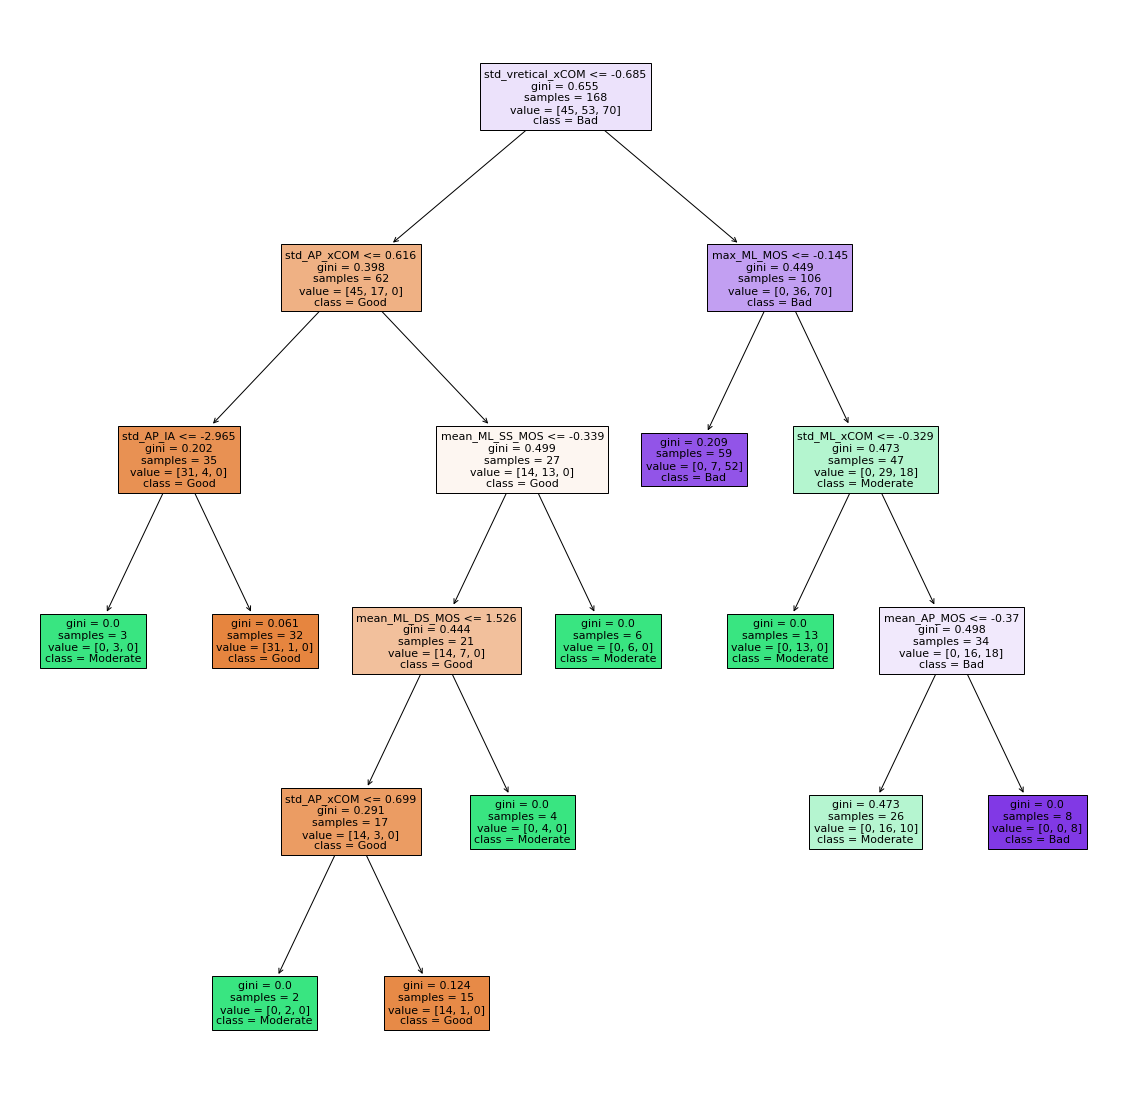

In [282]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_DT_best_reg, 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(511.5, 951.3000000000001, 'std_ML_xCOM <= -0.46\ngini = 0.647\nsamples = 102\nvalue = [44, 49, 75]\nclass = Bad'),
 Text(279.0, 679.5, 'mean_ML_SS_MOS <= 0.678\ngini = 0.444\nsamples = 43\nvalue = [42, 21, 0]\nclass = Good'),
 Text(186.0, 407.70000000000005, 'std_AP_xCOM <= 1.126\ngini = 0.375\nsamples = 38\nvalue = [42, 14, 0]\nclass = Good'),
 Text(93.0, 135.89999999999998, 'gini = 0.201\nsamples = 29\nvalue = [39, 5, 0]\nclass = Good'),
 Text(279.0, 135.89999999999998, 'gini = 0.375\nsamples = 9\nvalue = [3, 9, 0]\nclass = Moderate'),
 Text(372.0, 407.70000000000005, 'gini = 0.0\nsamples = 5\nvalue = [0, 7, 0]\nclass = Moderate'),
 Text(744.0, 679.5, 'std_vretical_xCOM <= 1.359\ngini = 0.418\nsamples = 59\nvalue = [2, 28, 75]\nclass = Bad'),
 Text(558.0, 407.70000000000005, 'min_AP_MOS <= -1.028\ngini = 0.328\nsamples = 50\nvalue = [2, 16, 72]\nclass = Bad'),
 Text(465.0, 135.89999999999998, 'gini = 0.497\nsamples = 11\nvalue = [0, 14, 12]\nclass = Moderate'),
 Text(651.0, 135

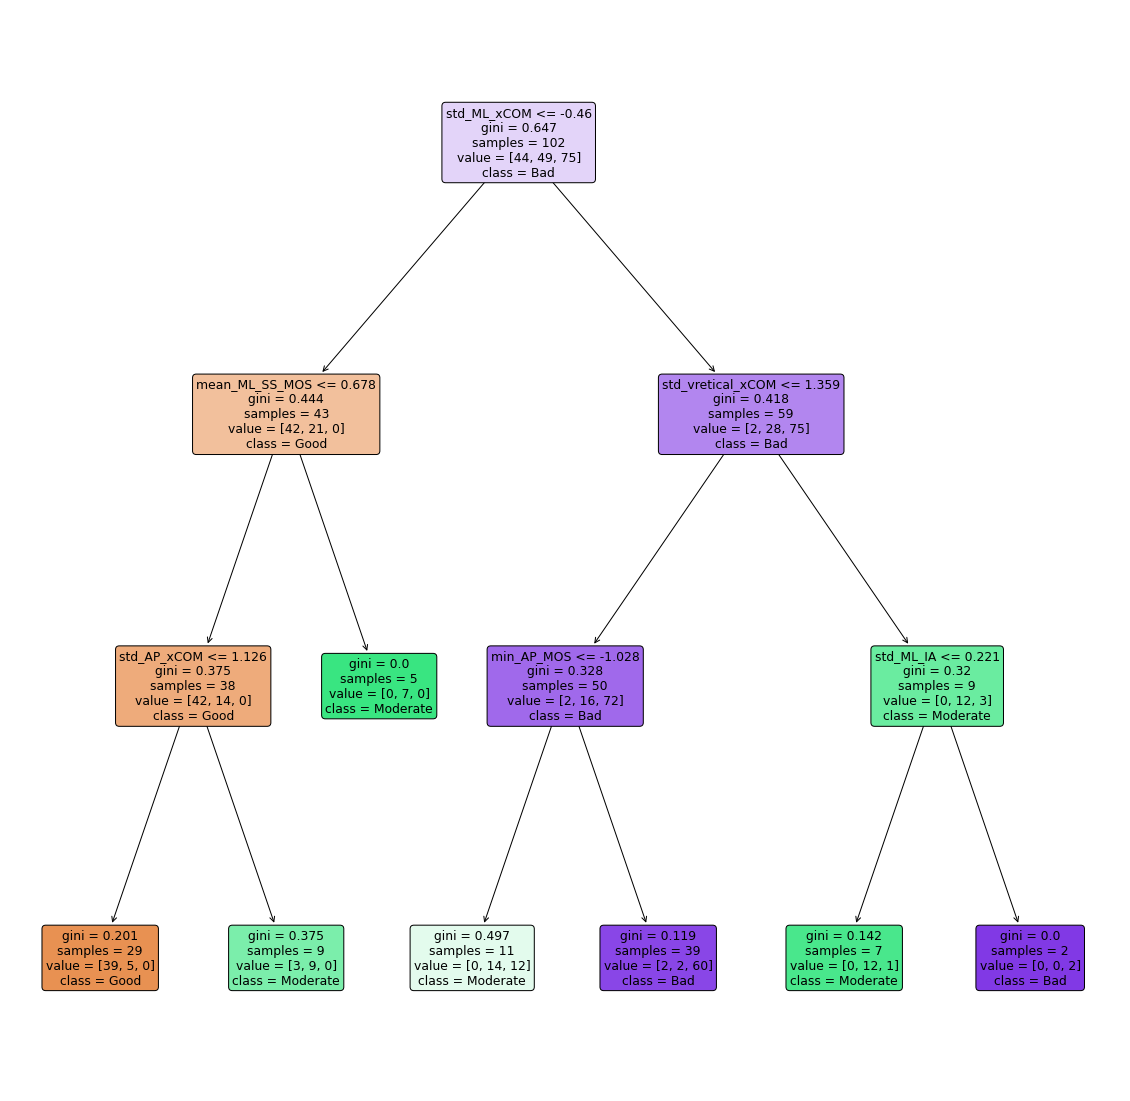

In [283]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(adv_RF_best_reg.estimators_[0], 
              feature_names=list(adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [284]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [285]:
acc_3_t = accuracy_score(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced SVC
acc: 0.75
recall: 0.685
precision: 0.693


Text(0.5, 1.0, 'SVC confusion matrix')

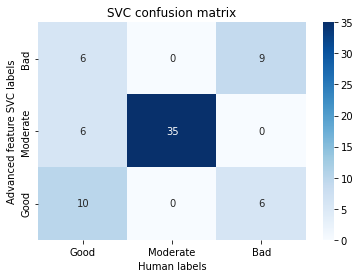

In [286]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_SVC_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [287]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature SVC Sensitivity: 
 Good prediction: 45.45454545454545 
 Moderate prediction 100.0 
 Bad prediction 60.0


In [288]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature SVC Precision: 
 Good prediction: 62.5 
 Moderate prediction 85.36585365853658 
 Bad prediction 60.0


In [289]:
acc_3_t = accuracy_score(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced DT
acc: 0.625
recall: 0.572
precision: 0.601


Text(0.5, 1.0, 'DT confusion matrix')

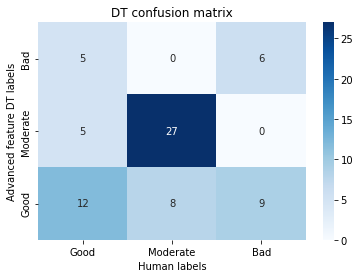

In [290]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_DT_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [291]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature DT Sensitivity: 
 Good prediction: 54.54545454545454 
 Moderate prediction 77.14285714285715 
 Bad prediction 40.0


In [292]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature DT Precision: 
 Good prediction: 41.37931034482759 
 Moderate prediction 84.375 
 Bad prediction 54.54545454545454


In [293]:
acc_3_t = accuracy_score(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("advanced RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

advanced RF
acc: 0.736
recall: 0.711
precision: 0.711


Text(0.5, 1.0, 'RF confusion matrix')

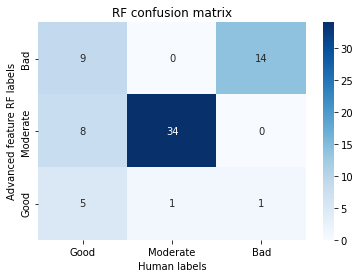

In [294]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), adv_RF_best_reg.predict(adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('Advanced feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [295]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("Advanced feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

Advanced feature RF Sensitivity: 
 Good prediction: 22.727272727272727 
 Moderate prediction 97.14285714285714 
 Bad prediction 93.33333333333333


In [296]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("Advanced feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


Advanced feature RF Precision: 
 Good prediction: 71.42857142857143 
 Moderate prediction 80.95238095238095 
 Bad prediction 60.86956521739131


### spa cop features

In [424]:
spa_cop_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_cop_SVC_grid_search.fit(spa_cop_x_train, y_train.ravel())
spa_cop_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [425]:
spa_cop_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_cop_DT_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 10}

In [426]:
spa_cop_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_cop_RF_grid_search.fit(spa_cop_x_train, y_train)
spa_cop_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 8,
 'n_estimators': 300}

In [427]:
spa_cop_SVC_best_reg = spa_cop_SVC_grid_search.best_estimator_
spa_cop_DT_best_reg = spa_cop_DT_grid_search.best_estimator_
spa_cop_RF_best_reg = spa_cop_RF_grid_search.best_estimator_

In [428]:
spa_cop_SVC_best_reg.score(spa_cop_x_test, y_test.ravel())

0.75

In [429]:
spa_cop_DT_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7916666666666666

In [430]:
spa_cop_RF_best_reg.score(spa_cop_x_test, y_test.ravel())

0.7777777777777778

[Text(401.0625, 978.48, 'max_AP_aCOM <= -0.219\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(139.5, 761.0400000000001, 'std_length <= -0.086\ngini = 0.395\nsamples = 85\nvalue = [2, 20, 63]\nclass = Bad'),
 Text(69.75, 543.6, 'gini = 0.0\nsamples = 45\nvalue = [0, 0, 45]\nclass = Bad'),
 Text(209.25, 543.6, 'std_AP_vCOM <= 0.468\ngini = 0.545\nsamples = 40\nvalue = [2, 20, 18]\nclass = Moderate'),
 Text(139.5, 326.1600000000001, 'std_vretical_vCOM <= 0.504\ngini = 0.533\nsamples = 29\nvalue = [2, 10, 17]\nclass = Bad'),
 Text(69.75, 108.72000000000003, 'gini = 0.43\nsamples = 22\nvalue = [2, 4, 16]\nclass = Bad'),
 Text(209.25, 108.72000000000003, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = Moderate'),
 Text(279.0, 326.1600000000001, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]\nclass = Moderate'),
 Text(662.625, 761.0400000000001, 'std_length <= 0.02\ngini = 0.566\nsamples = 83\nvalue = [43, 33, 7]\nclass = Good'),
 Text(488.25, 543.6, 'std_wid

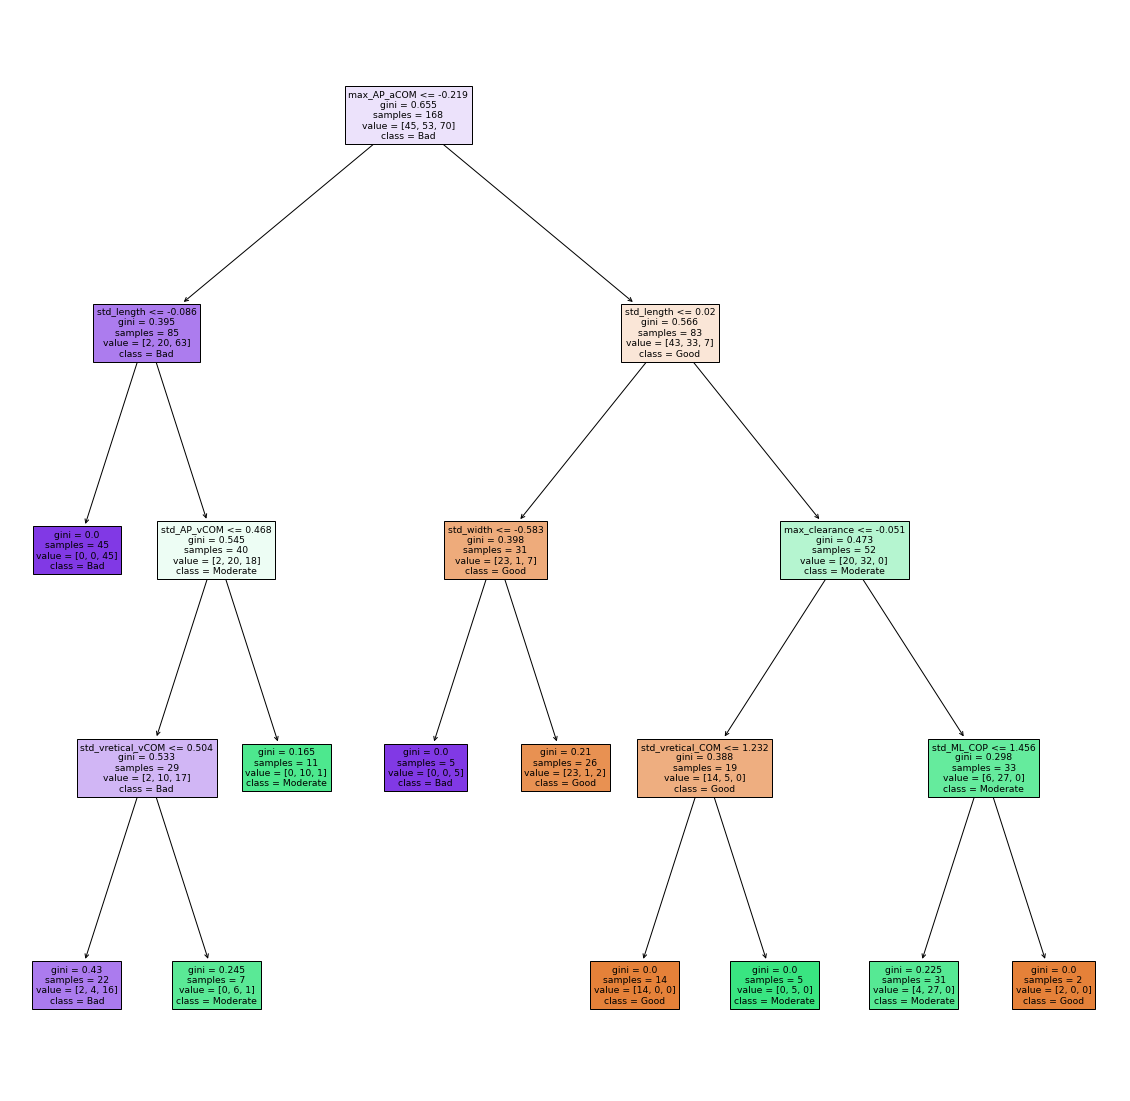

In [431]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_DT_best_reg, 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_length <= -0.093\nentropy = 1.581\nsamples = 107\nvalue = [56, 51, 61]\nclass = Bad'),
 Text(279.0, 679.5, 'std_width <= 0.615\nentropy = 0.942\nsamples = 46\nvalue = [28, 0, 50]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_vretical_aCOM <= 0.159\nentropy = 0.57\nsamples = 32\nvalue = [7, 0, 45]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 45]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [7, 0, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'max_ML_aCOM <= -0.417\nentropy = 0.706\nsamples = 14\nvalue = [21, 0, 5]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 5]\nclass = Bad'),
 Text(488.25, 135.89999999999998, 'entropy = 0.0\nsamples = 11\nvalue = [21, 0, 0]\nclass = Good'),
 Text(837.0, 679.5, 'std_ML_COM <= -0.108\nentropy = 1.359\nsamples = 61\nvalue = [28, 51, 11]\nclass = Moderate'),
 Text(69

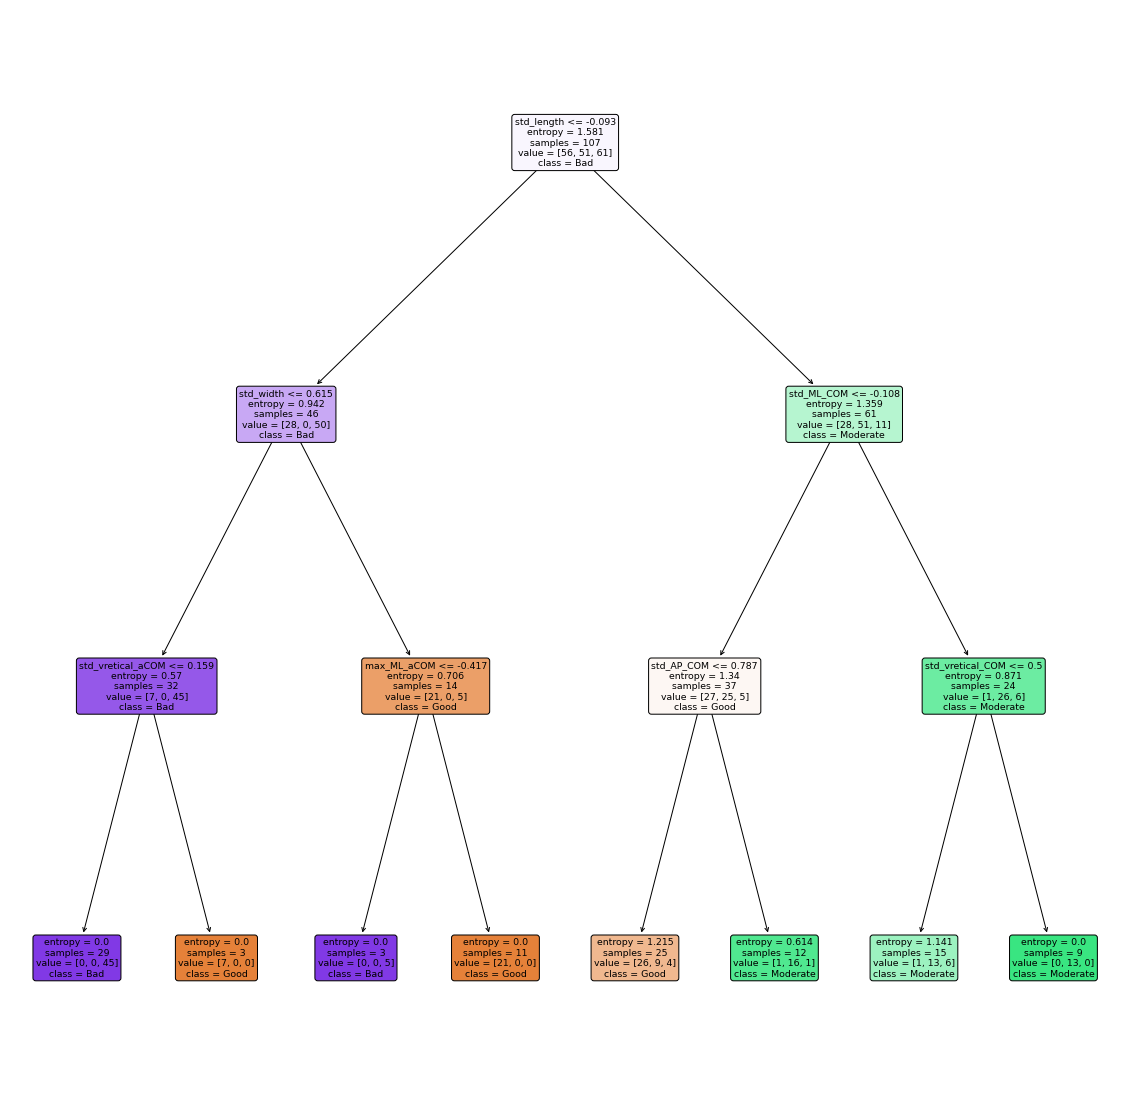

In [432]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_cop_RF_best_reg.estimators_[0], 
              feature_names=list(spa_cop_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [433]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [434]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop SVC
acc: 0.75
recall: 0.669
precision: 0.703


Text(0.5, 1.0, 'SVC confusion matrix')

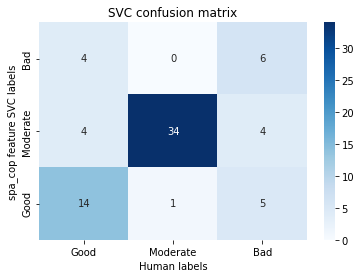

In [435]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_SVC_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [436]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature SVC Sensitivity: 
 Good prediction: 63.63636363636363 
 Moderate prediction 97.14285714285714 
 Bad prediction 40.0


In [437]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature SVC Precision: 
 Good prediction: 70.0 
 Moderate prediction 80.95238095238095 
 Bad prediction 60.0


In [438]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop DT
acc: 0.792
recall: 0.733
precision: 0.762


Text(0.5, 1.0, 'DT confusion matrix')

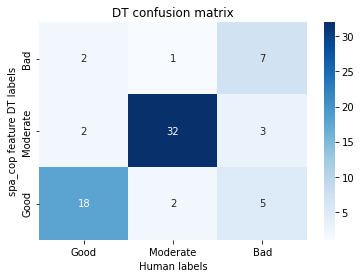

In [439]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_DT_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [440]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature DT Sensitivity: 
 Good prediction: 81.81818181818183 
 Moderate prediction 91.42857142857143 
 Bad prediction 46.666666666666664


In [441]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature DT Precision: 
 Good prediction: 72.0 
 Moderate prediction 86.48648648648648 
 Bad prediction 70.0


In [442]:
acc_3_t = accuracy_score(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_cop RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_cop RF
acc: 0.778
recall: 0.721
precision: 0.761


Text(0.5, 1.0, 'RF confusion matrix')

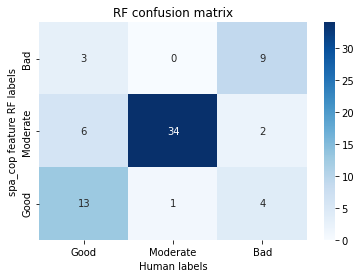

In [443]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_cop_RF_best_reg.predict(spa_cop_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_cop feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [444]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_cop feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_cop feature RF Sensitivity: 
 Good prediction: 59.09090909090909 
 Moderate prediction 97.14285714285714 
 Bad prediction 60.0


In [445]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_cop feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_cop feature RF Precision: 
 Good prediction: 72.22222222222221 
 Moderate prediction 80.95238095238095 
 Bad prediction 75.0


### spa adv features

In [446]:
spa_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
spa_adv_SVC_grid_search.fit(spa_adv_x_train, y_train.ravel())
spa_adv_SVC_grid_search.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [447]:
spa_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
spa_adv_DT_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10}

In [448]:
spa_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
spa_adv_RF_grid_search.fit(spa_adv_x_train, y_train)
spa_adv_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 200}

In [449]:
spa_adv_SVC_best_reg = spa_adv_SVC_grid_search.best_estimator_
spa_adv_DT_best_reg = spa_adv_DT_grid_search.best_estimator_
spa_adv_RF_best_reg = spa_adv_RF_grid_search.best_estimator_

In [450]:
spa_adv_SVC_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8055555555555556

In [451]:
spa_adv_DT_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8333333333333334

In [452]:
spa_adv_RF_best_reg.score(spa_adv_x_test, y_test.ravel())

0.8194444444444444

[Text(401.0625, 978.48, 'std_vretical_xCOM <= -0.685\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(139.5, 761.0400000000001, 'max_clearance <= 0.025\ngini = 0.398\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(69.75, 543.6, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0]\nclass = Good'),
 Text(209.25, 543.6, 'std_length <= -0.07\ngini = 0.498\nsamples = 36\nvalue = [19, 17, 0]\nclass = Good'),
 Text(139.5, 326.1600000000001, 'gini = 0.124\nsamples = 15\nvalue = [14, 1, 0]\nclass = Good'),
 Text(279.0, 326.1600000000001, 'ROM_ML_MOS <= 0.912\ngini = 0.363\nsamples = 21\nvalue = [5, 16, 0]\nclass = Moderate'),
 Text(209.25, 108.72000000000003, 'gini = 0.111\nsamples = 17\nvalue = [1, 16, 0]\nclass = Moderate'),
 Text(348.75, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(662.625, 761.0400000000001, 'std_length <= -0.027\ngini = 0.449\nsamples = 106\nvalue = [0, 36, 70]\nclass = Bad'),
 Text(488.25, 543.6, 'std_vr

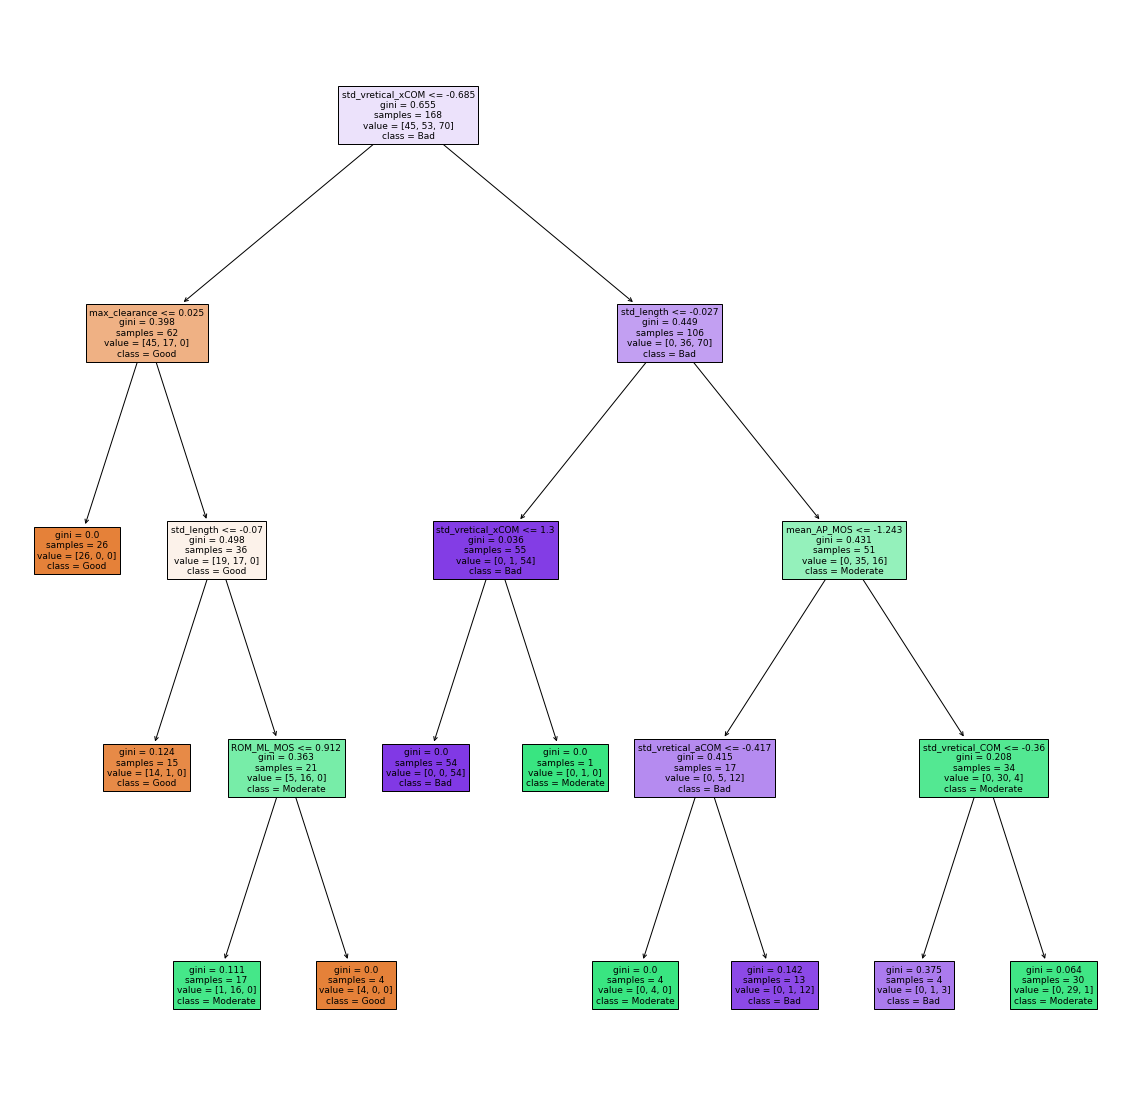

In [453]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_DT_best_reg, 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_vretical_vCOM <= 0.464\nentropy = 1.576\nsamples = 104\nvalue = [55, 49, 64]\nclass = Bad'),
 Text(279.0, 679.5, 'min_AP_MOS <= 0.778\nentropy = 1.499\nsamples = 84\nvalue = [44, 26, 63]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'mean_AP_MOS <= 0.237\nentropy = 1.255\nsamples = 64\nvalue = [18, 14, 63]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.606\nsamples = 46\nvalue = [0, 11, 63]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'entropy = 0.592\nsamples = 18\nvalue = [18, 3, 0]\nclass = Good'),
 Text(418.5, 407.70000000000005, 'std_vretical_xCOM <= -1.207\nentropy = 0.9\nsamples = 20\nvalue = [26, 12, 0]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'entropy = 0.0\nsamples = 9\nvalue = [21, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'entropy = 0.874\nsamples = 11\nvalue = [5, 12, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_ML_xCOM <= -0.59\nentropy = 1.069\nsamples = 20\nvalue = [11, 23, 1]\nclas

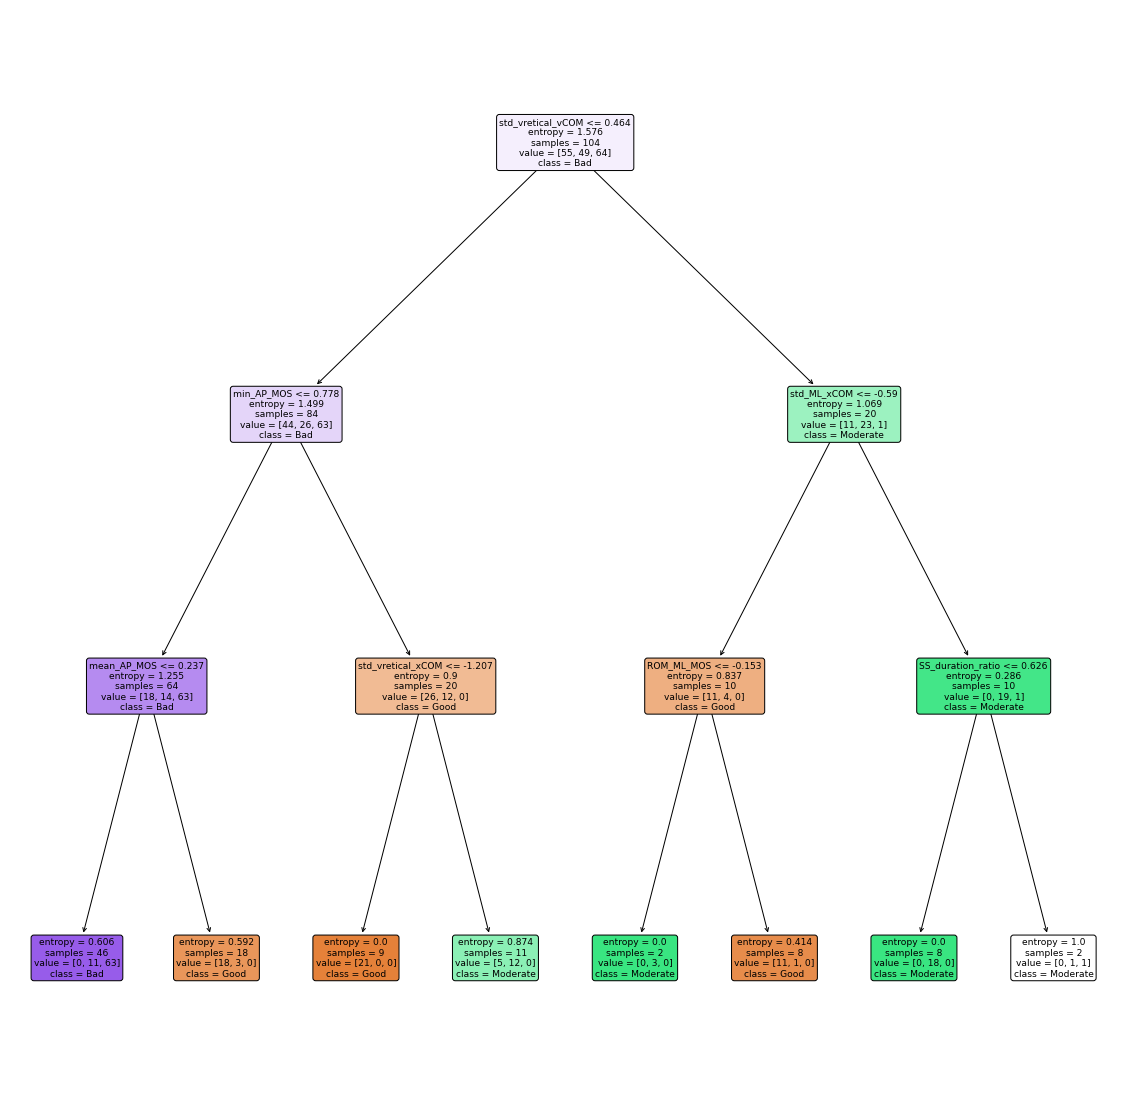

In [454]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(spa_adv_RF_best_reg.estimators_[0], 
              feature_names=list(spa_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [455]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [456]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv SVC
acc: 0.806
recall: 0.767
precision: 0.782


Text(0.5, 1.0, 'SVC confusion matrix')

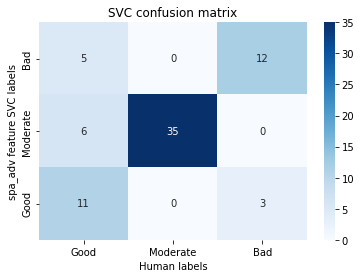

In [457]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_SVC_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [458]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature SVC Sensitivity: 
 Good prediction: 50.0 
 Moderate prediction 100.0 
 Bad prediction 80.0


In [459]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature SVC Precision: 
 Good prediction: 78.57142857142857 
 Moderate prediction 85.36585365853658 
 Bad prediction 70.58823529411765


In [460]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv DT
acc: 0.833
recall: 0.801
precision: 0.822


Text(0.5, 1.0, 'DT confusion matrix')

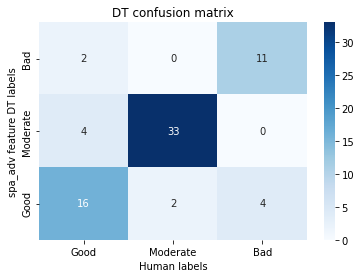

In [461]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_DT_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [462]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature DT Sensitivity: 
 Good prediction: 72.72727272727273 
 Moderate prediction 94.28571428571428 
 Bad prediction 73.33333333333333


In [463]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature DT Precision: 
 Good prediction: 72.72727272727273 
 Moderate prediction 89.1891891891892 
 Bad prediction 84.61538461538461


In [464]:
acc_3_t = accuracy_score(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("spa_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

spa_adv RF
acc: 0.819
recall: 0.789
precision: 0.802


Text(0.5, 1.0, 'RF confusion matrix')

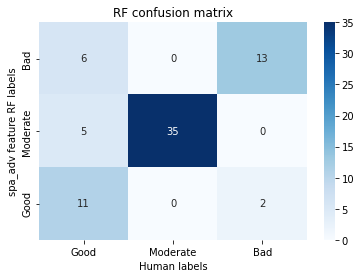

In [465]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), spa_adv_RF_best_reg.predict(spa_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('spa_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [466]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("spa_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

spa_adv feature RF Sensitivity: 
 Good prediction: 50.0 
 Moderate prediction 100.0 
 Bad prediction 86.66666666666667


In [467]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("spa_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


spa_adv feature RF Precision: 
 Good prediction: 84.61538461538461 
 Moderate prediction 87.5 
 Bad prediction 68.42105263157895


### cop adv features

In [468]:
cop_adv_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
cop_adv_SVC_grid_search.fit(cop_adv_x_train, y_train.ravel())
cop_adv_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [469]:
cop_adv_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
cop_adv_DT_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10}

In [470]:
cop_adv_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
cop_adv_RF_grid_search.fit(cop_adv_x_train, y_train)
cop_adv_RF_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 100}

In [471]:
cop_adv_SVC_best_reg = cop_adv_SVC_grid_search.best_estimator_
cop_adv_DT_best_reg = cop_adv_DT_grid_search.best_estimator_
cop_adv_RF_best_reg = cop_adv_RF_grid_search.best_estimator_

In [472]:
cop_adv_SVC_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7638888888888888

In [473]:
cop_adv_DT_best_reg.score(cop_adv_x_test, y_test.ravel())

0.6805555555555556

In [474]:
cop_adv_RF_best_reg.score(cop_adv_x_test, y_test.ravel())

0.7777777777777778

[Text(488.25, 978.48, 'std_vretical_xCOM <= -0.685\nentropy = 1.56\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(209.25, 761.0400000000001, 'mean_ML_SS_MOS <= -1.083\nentropy = 0.847\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(139.5, 543.6, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0]\nclass = Good'),
 Text(279.0, 543.6, 'std_AP_vCOP <= -0.324\nentropy = 0.95\nsamples = 46\nvalue = [29, 17, 0]\nclass = Good'),
 Text(139.5, 326.1600000000001, 'min_AP_MOS <= 1.73\nentropy = 0.722\nsamples = 10\nvalue = [2, 8, 0]\nclass = Moderate'),
 Text(69.75, 108.72000000000003, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8, 0]\nclass = Moderate'),
 Text(209.25, 108.72000000000003, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = Good'),
 Text(418.5, 326.1600000000001, 'std_AP_xCOM <= 0.616\nentropy = 0.811\nsamples = 36\nvalue = [27, 9, 0]\nclass = Good'),
 Text(348.75, 108.72000000000003, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0]\nclass = Good'),
 Text(488.2

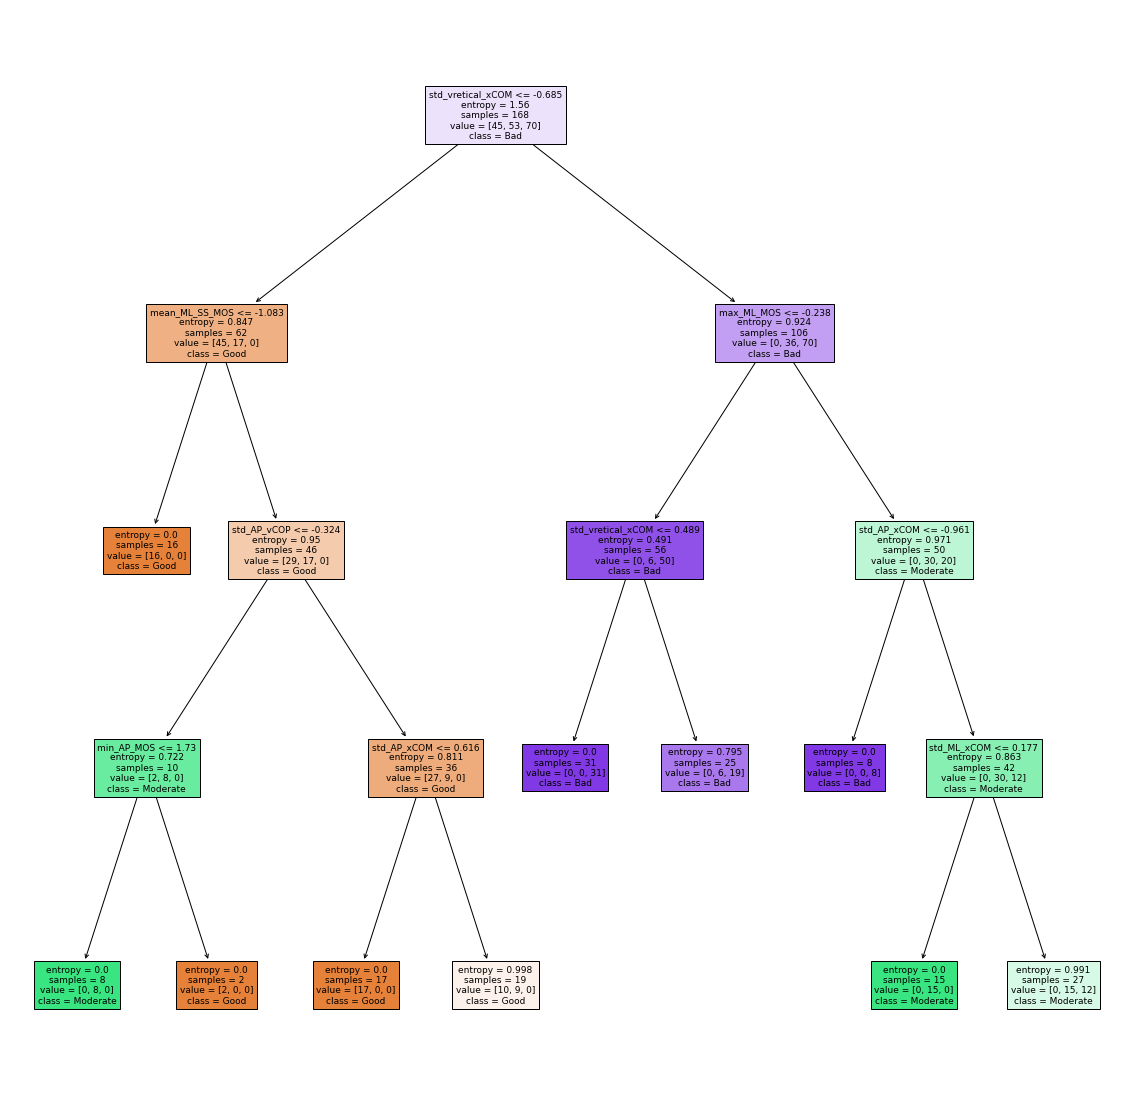

In [475]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_DT_best_reg, 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'max_ML_MOS <= 0.004\ngini = 0.651\nsamples = 108\nvalue = [41, 56, 71]\nclass = Bad'),
 Text(279.0, 679.5, 'mean_AP_MOS <= 0.436\ngini = 0.264\nsamples = 46\nvalue = [2, 8, 56]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_ML_vCOP <= 1.144\ngini = 0.198\nsamples = 44\nvalue = [0, 7, 56]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.111\nsamples = 38\nvalue = [0, 3, 48]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.444\nsamples = 6\nvalue = [0, 4, 8]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_AP_MOS <= 0.091\ngini = 0.444\nsamples = 2\nvalue = [2, 1, 0]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]\nclass = Good'),
 Text(488.25, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Moderate'),
 Text(837.0, 679.5, 'std_vretical_xCOM <= -0.685\ngini = 0.611\nsamples = 62\nvalue = [39, 48, 15]\nclass = Moderate'),
 Text(697.5, 407.70000000000005

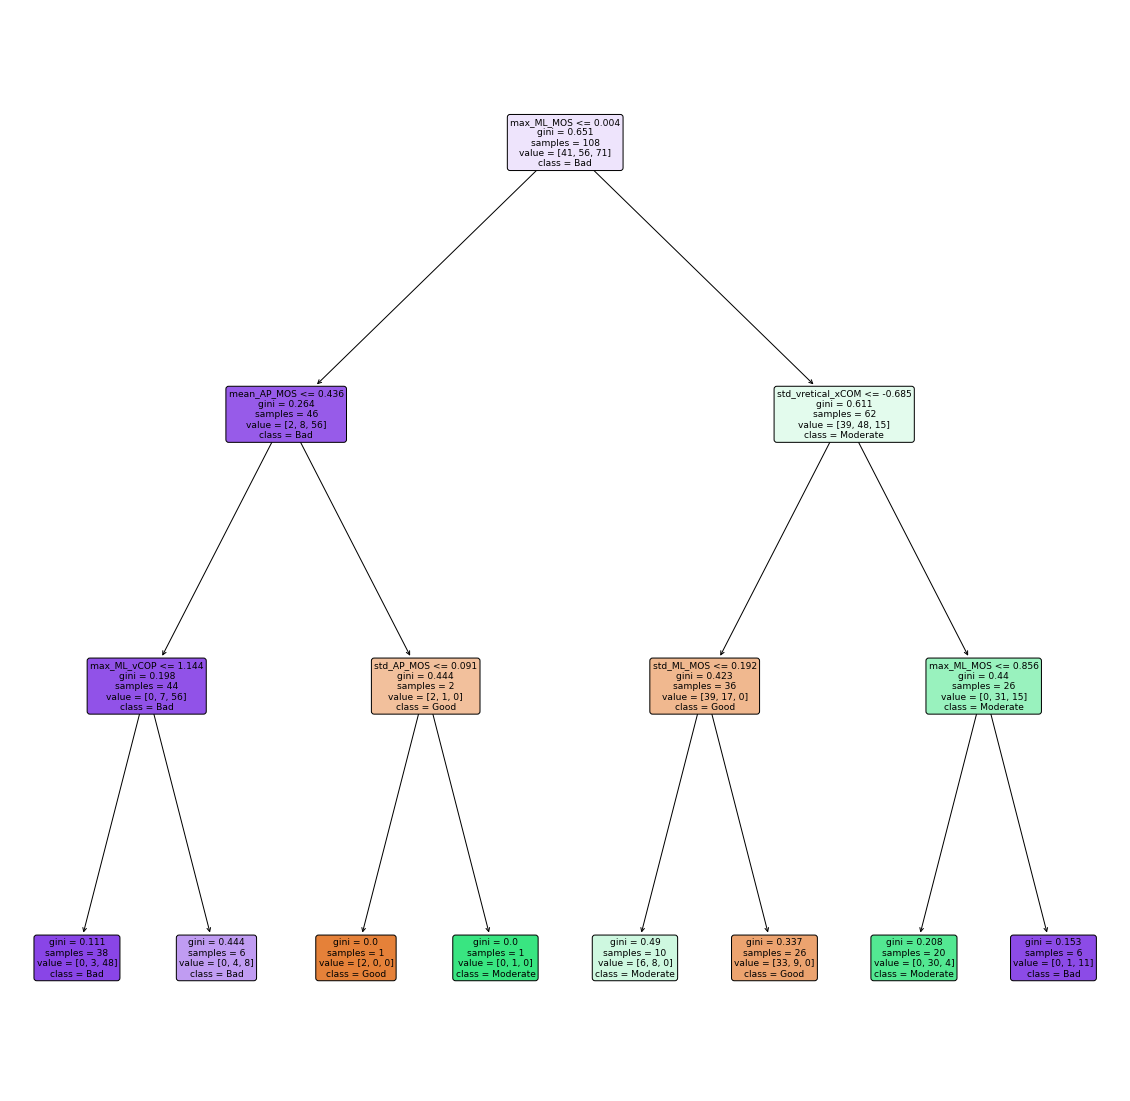

In [476]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(cop_adv_RF_best_reg.estimators_[0], 
              feature_names=list(cop_adv_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [477]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [478]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv SVC
acc: 0.764
recall: 0.744
precision: 0.74


Text(0.5, 1.0, 'SVC confusion matrix')

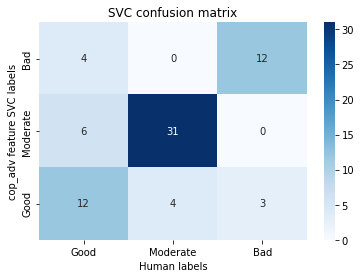

In [479]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_SVC_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [480]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature SVC Sensitivity: 
 Good prediction: 54.54545454545454 
 Moderate prediction 88.57142857142857 
 Bad prediction 80.0


In [481]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature SVC Precision: 
 Good prediction: 63.1578947368421 
 Moderate prediction 83.78378378378379 
 Bad prediction 75.0


In [482]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv DT
acc: 0.681
recall: 0.688
precision: 0.654


Text(0.5, 1.0, 'DT confusion matrix')

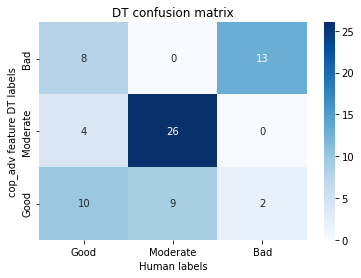

In [483]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_DT_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [484]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature DT Sensitivity: 
 Good prediction: 45.45454545454545 
 Moderate prediction 74.28571428571429 
 Bad prediction 86.66666666666667


In [485]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature DT Precision: 
 Good prediction: 47.61904761904761 
 Moderate prediction 86.66666666666667 
 Bad prediction 61.904761904761905


In [486]:
acc_3_t = accuracy_score(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("cop_adv RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

cop_adv RF
acc: 0.778
recall: 0.743
precision: 0.761


Text(0.5, 1.0, 'RF confusion matrix')

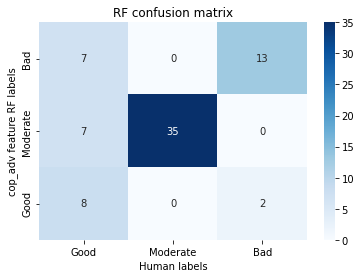

In [487]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), cop_adv_RF_best_reg.predict(cop_adv_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [488]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("cop_adv feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

cop_adv feature RF Sensitivity: 
 Good prediction: 36.36363636363637 
 Moderate prediction 100.0 
 Bad prediction 86.66666666666667


In [489]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("cop_adv feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


cop_adv feature RF Precision: 
 Good prediction: 80.0 
 Moderate prediction 83.33333333333334 
 Bad prediction 65.0


### kinematic features

In [535]:
kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
kine_SVC_grid_search.fit(kine_x_train, y_train.ravel())
kine_SVC_grid_search.best_params_

{'C': 3, 'degree': 2, 'kernel': 'rbf', 'probability': True}

In [536]:
kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
kine_DT_grid_search.fit(kine_x_train, y_train)
kine_DT_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9}

In [537]:
kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
kine_RF_grid_search.fit(kine_x_train, y_train)
kine_RF_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 100}

In [538]:
kine_SVC_best_reg = kine_SVC_grid_search.best_estimator_
kine_DT_best_reg = kine_DT_grid_search.best_estimator_
kine_RF_best_reg = kine_RF_grid_search.best_estimator_

In [539]:
kine_SVC_best_reg.score(kine_x_test, y_test.ravel())

0.8888888888888888

In [540]:
kine_DT_best_reg.score(kine_x_test, y_test.ravel())

0.8194444444444444

In [541]:
kine_RF_best_reg.score(kine_x_test, y_test.ravel())

0.8611111111111112

[Text(438.4285714285714, 978.48, 'std_vertical_xCOM <= -0.685\ngini = 0.655\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(159.42857142857142, 761.0400000000001, 'max_clearance <= 0.025\ngini = 0.398\nsamples = 62\nvalue = [45, 17, 0]\nclass = Good'),
 Text(79.71428571428571, 543.6, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0]\nclass = Good'),
 Text(239.1428571428571, 543.6, 'std_length <= -0.07\ngini = 0.498\nsamples = 36\nvalue = [19, 17, 0]\nclass = Good'),
 Text(159.42857142857142, 326.1600000000001, 'gini = 0.124\nsamples = 15\nvalue = [14, 1, 0]\nclass = Good'),
 Text(318.85714285714283, 326.1600000000001, 'ROM_ML_MOS <= 0.912\ngini = 0.363\nsamples = 21\nvalue = [5, 16, 0]\nclass = Moderate'),
 Text(239.1428571428571, 108.72000000000003, 'gini = 0.111\nsamples = 17\nvalue = [1, 16, 0]\nclass = Moderate'),
 Text(398.57142857142856, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Good'),
 Text(717.4285714285713, 761.0400000000001, 'std_length 

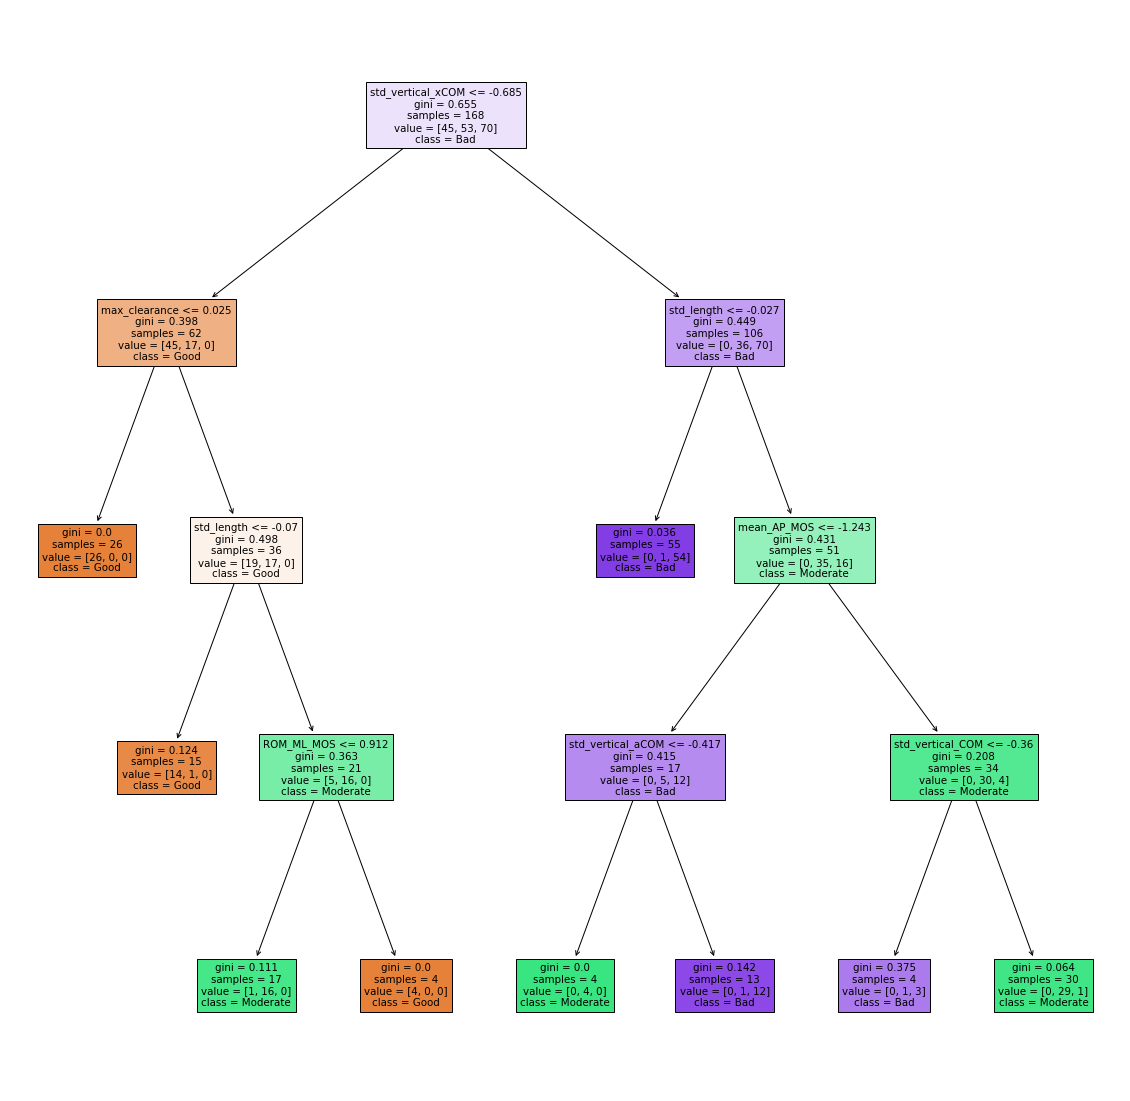

In [542]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_DT_best_reg, 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'mean_AP_MOS <= 0.16\ngini = 0.632\nsamples = 104\nvalue = [39, 48, 81]\nclass = Bad'),
 Text(279.0, 679.5, 'std_AP_xCOM <= -0.373\ngini = 0.368\nsamples = 65\nvalue = [0, 26, 81]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'max_ML_MOS <= 0.529\ngini = 0.124\nsamples = 36\nvalue = [0, 4, 56]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'gini = 0.036\nsamples = 31\nvalue = [0, 1, 53]\nclass = Bad'),
 Text(209.25, 135.89999999999998, 'gini = 0.5\nsamples = 5\nvalue = [0, 3, 3]\nclass = Moderate'),
 Text(418.5, 407.70000000000005, 'std_width <= -1.119\ngini = 0.498\nsamples = 29\nvalue = [0, 22, 25]\nclass = Bad'),
 Text(348.75, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 10, 0]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'gini = 0.438\nsamples = 25\nvalue = [0, 12, 25]\nclass = Bad'),
 Text(837.0, 679.5, 'max_clearance <= 0.071\ngini = 0.461\nsamples = 39\nvalue = [39, 22, 0]\nclass = Good'),
 Text(697.5, 407.7000000000000

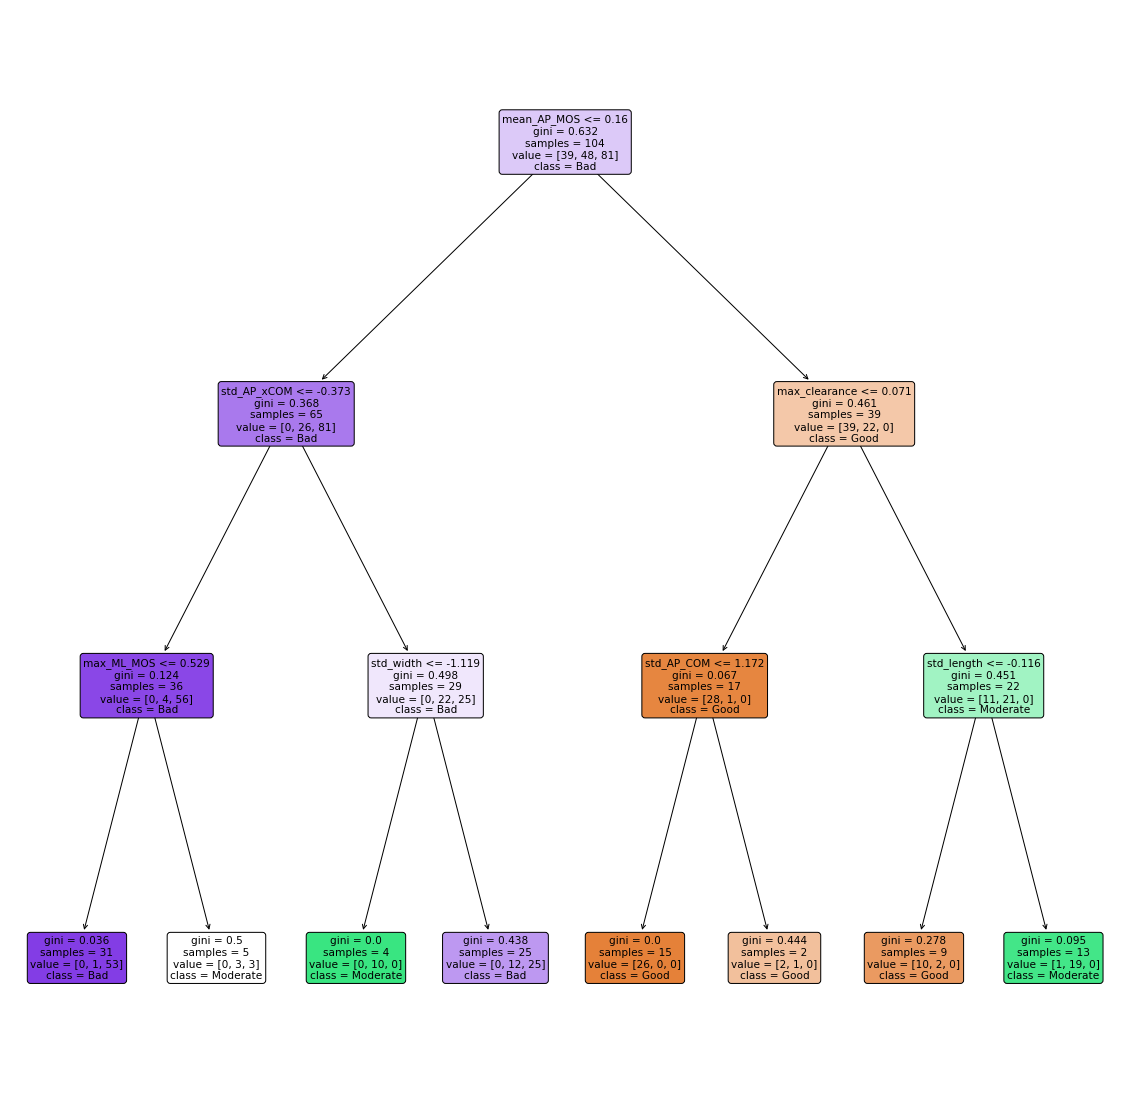

In [543]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(kine_RF_best_reg.estimators_[0], 
              feature_names=list(kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [544]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [545]:
acc_3_t = accuracy_score(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine SVC
acc: 0.889
recall: 0.877
precision: 0.87


Text(0.5, 1.0, 'SVC confusion matrix')

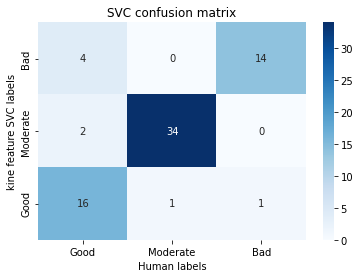

In [546]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_SVC_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [547]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature SVC Sensitivity: 
 Good prediction: 72.72727272727273 
 Moderate prediction 97.14285714285714 
 Bad prediction 93.33333333333333


In [548]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature SVC Precision: 
 Good prediction: 88.88888888888889 
 Moderate prediction 94.44444444444444 
 Bad prediction 77.77777777777779


In [549]:
acc_3_t = accuracy_score(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine DT
acc: 0.819
recall: 0.786
precision: 0.81


Text(0.5, 1.0, 'DT confusion matrix')

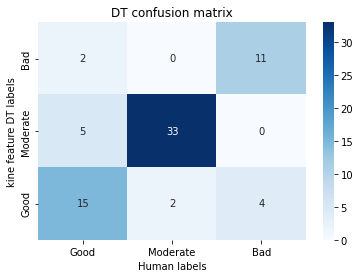

In [550]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_DT_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [551]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature DT Sensitivity: 
 Good prediction: 68.18181818181817 
 Moderate prediction 94.28571428571428 
 Bad prediction 73.33333333333333


In [552]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature DT Precision: 
 Good prediction: 71.42857142857143 
 Moderate prediction 86.8421052631579 
 Bad prediction 84.61538461538461


In [553]:
acc_3_t = accuracy_score(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

kine RF
acc: 0.861
recall: 0.847
precision: 0.844


Text(0.5, 1.0, 'RF confusion matrix')

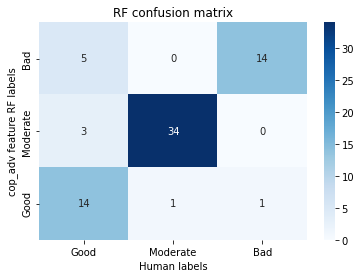

In [554]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), kine_RF_best_reg.predict(kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('cop_adv feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [556]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

kine feature RF Sensitivity: 
 Good prediction: 63.63636363636363 
 Moderate prediction 97.14285714285714 
 Bad prediction 93.33333333333333


In [557]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


kine feature RF Precision: 
 Good prediction: 87.5 
 Moderate prediction 91.8918918918919 
 Bad prediction 73.68421052631578


### non kinematic features

In [558]:
non_kine_SVC_grid_search = GridSearchCV(SVC_reg, param_grid = SVC_para, cv = 10, return_train_score = True)
non_kine_SVC_grid_search.fit(non_kine_x_train, y_train.ravel())
non_kine_SVC_grid_search.best_params_

{'C': 1.2, 'degree': 2, 'kernel': 'linear', 'probability': True}

In [559]:
non_kine_DT_grid_search = GridSearchCV(DT_reg, param_grid = DT_para, cv = 10, return_train_score = True)
non_kine_DT_grid_search.fit(non_kine_x_train, y_train)
non_kine_DT_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 8}

In [560]:
non_kine_RF_grid_search = GridSearchCV(RF_reg, param_grid = RF_para, cv = 10, return_train_score = True)
non_kine_RF_grid_search.fit(non_kine_x_train, y_train)
non_kine_RF_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 10,
 'n_estimators': 100}

In [561]:
non_kine_SVC_best_reg = non_kine_SVC_grid_search.best_estimator_
non_kine_DT_best_reg = non_kine_DT_grid_search.best_estimator_
non_kine_RF_best_reg = non_kine_RF_grid_search.best_estimator_

In [562]:
non_kine_SVC_best_reg.score(non_kine_x_test, y_test.ravel())

0.5416666666666666

In [563]:
non_kine_DT_best_reg.score(non_kine_x_test, y_test.ravel())

0.625

In [564]:
non_kine_RF_best_reg.score(non_kine_x_test, y_test.ravel())

0.625

[Text(496.0, 978.48, 'std_AP_aCOP <= -0.185\nentropy = 1.56\nsamples = 168\nvalue = [45, 53, 70]\nclass = Bad'),
 Text(248.0, 761.0400000000001, 'std_ML_vCOP <= -1.475\nentropy = 1.247\nsamples = 93\nvalue = [8, 27, 58]\nclass = Bad'),
 Text(124.0, 543.6, 'entropy = 0.954\nsamples = 8\nvalue = [3, 5, 0]\nclass = Moderate'),
 Text(372.0, 543.6, 'mean_AP_IA <= 0.633\nentropy = 1.121\nsamples = 85\nvalue = [5, 22, 58]\nclass = Bad'),
 Text(248.0, 326.1600000000001, 'std_AP_IA <= -0.441\nentropy = 0.923\nsamples = 74\nvalue = [2, 16, 56]\nclass = Bad'),
 Text(124.0, 108.72000000000003, 'entropy = 0.229\nsamples = 27\nvalue = [0, 1, 26]\nclass = Bad'),
 Text(372.0, 108.72000000000003, 'entropy = 1.133\nsamples = 47\nvalue = [2, 15, 30]\nclass = Bad'),
 Text(496.0, 326.1600000000001, 'entropy = 1.435\nsamples = 11\nvalue = [3, 6, 2]\nclass = Moderate'),
 Text(744.0, 761.0400000000001, 'std_AP_vCOP <= -0.158\nentropy = 1.456\nsamples = 75\nvalue = [37, 26, 12]\nclass = Good'),
 Text(620.0, 54

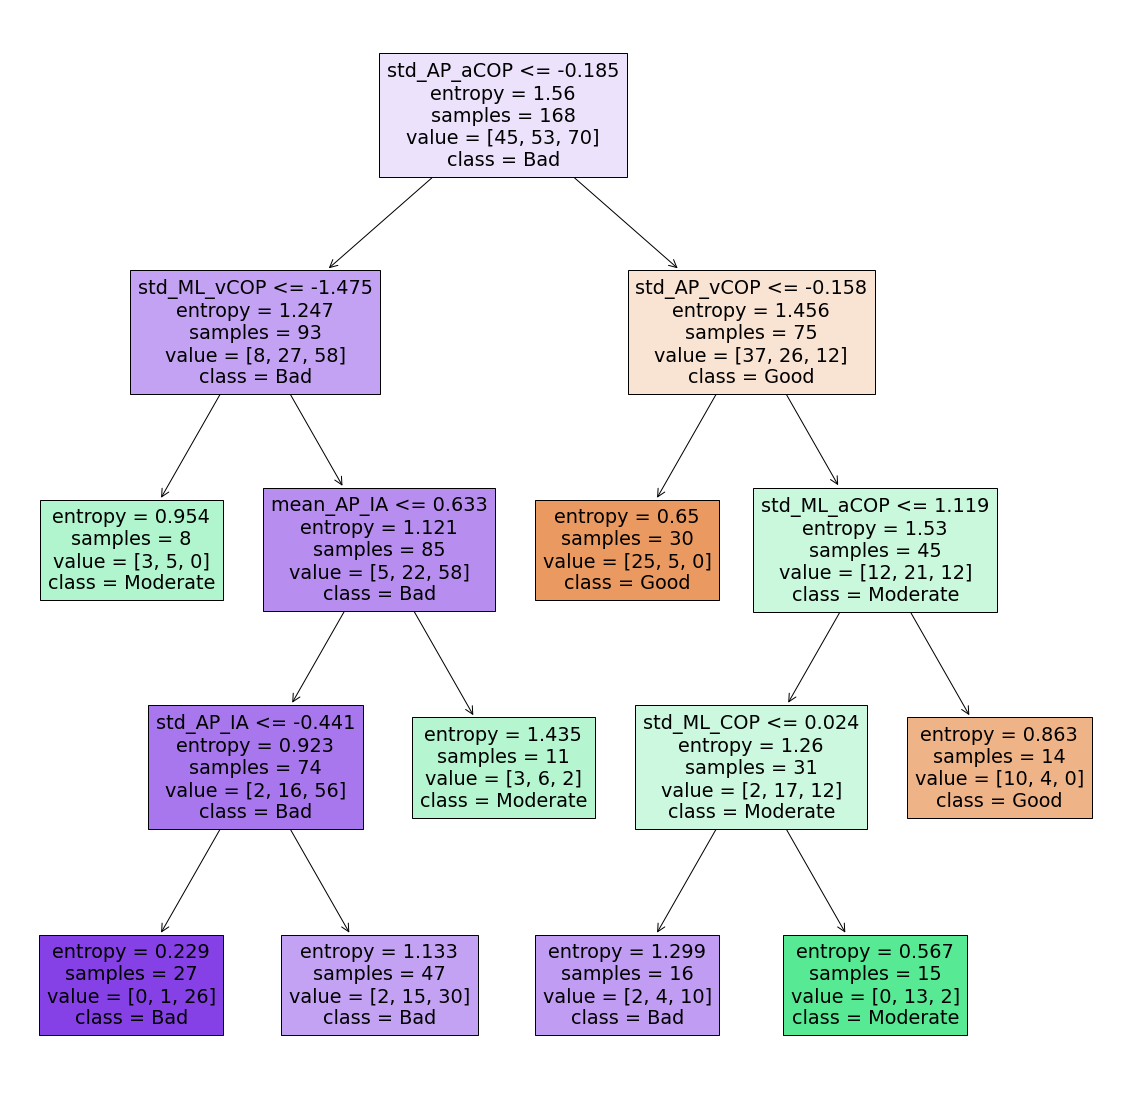

In [565]:
from sklearn import  tree
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_DT_best_reg, 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True)

[Text(558.0, 951.3000000000001, 'std_AP_IA <= -0.015\nentropy = 1.577\nsamples = 104\nvalue = [49, 56, 63]\nclass = Bad'),
 Text(279.0, 679.5, 'std_ML_aCOP <= 0.208\nentropy = 1.409\nsamples = 51\nvalue = [11, 24, 41]\nclass = Bad'),
 Text(139.5, 407.70000000000005, 'std_AP_IA <= -1.237\nentropy = 1.102\nsamples = 42\nvalue = [2, 20, 39]\nclass = Bad'),
 Text(69.75, 135.89999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [0, 9, 0]\nclass = Moderate'),
 Text(209.25, 135.89999999999998, 'entropy = 0.966\nsamples = 37\nvalue = [2, 11, 39]\nclass = Bad'),
 Text(418.5, 407.70000000000005, 'std_AP_COP <= -0.003\nentropy = 1.338\nsamples = 9\nvalue = [9, 4, 2]\nclass = Good'),
 Text(348.75, 135.89999999999998, 'entropy = 1.0\nsamples = 3\nvalue = [0, 2, 2]\nclass = Moderate'),
 Text(488.25, 135.89999999999998, 'entropy = 0.684\nsamples = 6\nvalue = [9, 2, 0]\nclass = Good'),
 Text(837.0, 679.5, 'std_AP_vCOP <= -0.155\nentropy = 1.55\nsamples = 53\nvalue = [38, 32, 22]\nclass = Good'),
 Text(

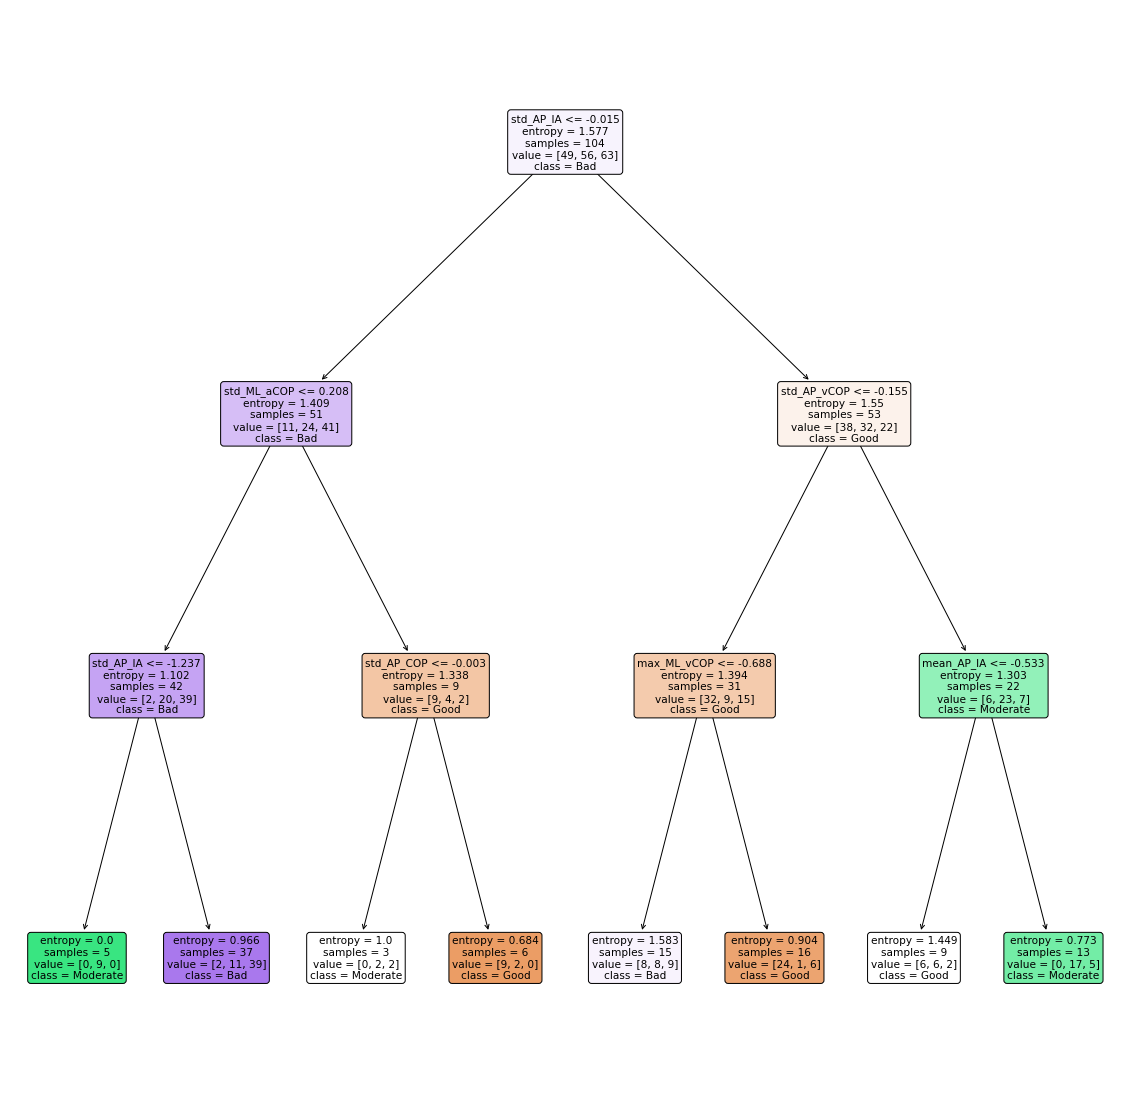

In [566]:
figure = plt.figure(figsize = (20,20))
tree.plot_tree(non_kine_RF_best_reg.estimators_[0], 
              feature_names=list(non_kine_input_df.columns),  
              class_names=["Good", "Moderate", "Bad"],
              filled=True,
              rounded=True)


In [567]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [568]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine SVC" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine SVC
acc: 0.542
recall: 0.477
precision: 0.448


Text(0.5, 1.0, 'SVC confusion matrix')

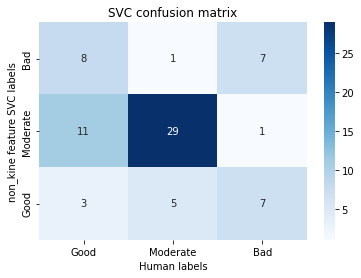

In [569]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_SVC_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature SVC labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("SVC confusion matrix")

In [570]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature SVC Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature SVC Sensitivity: 
 Good prediction: 13.636363636363635 
 Moderate prediction 82.85714285714286 
 Bad prediction 46.666666666666664


In [571]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature SVC Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature SVC Precision: 
 Good prediction: 20.0 
 Moderate prediction 70.73170731707317 
 Bad prediction 43.75


In [572]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine DT" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine DT
acc: 0.625
recall: 0.601
precision: 0.601


Text(0.5, 1.0, 'DT confusion matrix')

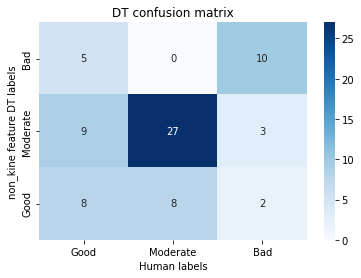

In [573]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_DT_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature DT labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("DT confusion matrix")

In [574]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature DT Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature DT Sensitivity: 
 Good prediction: 36.36363636363637 
 Moderate prediction 77.14285714285715 
 Bad prediction 66.66666666666666


In [575]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature DT Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature DT Precision: 
 Good prediction: 44.44444444444444 
 Moderate prediction 69.23076923076923 
 Bad prediction 66.66666666666666


In [576]:
acc_3_t = accuracy_score(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
cm_3_t = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test))
recall = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 1)
recall_3_t = np.mean(recall)
precision = np.diag(cm_3_t) / np.sum(cm_3_t, axis = 0)
precision_3_t = np.nanmean(precision)
print("non_kine RF" + "\n"+ "acc: " + str(round(acc_3_t, 3)) + "\n" + "recall: " + str(round(recall_3_t,3)) + "\n" + "precision: " + str(round(precision_3_t,3)))

non_kine RF
acc: 0.625
recall: 0.581
precision: 0.581


Text(0.5, 1.0, 'RF confusion matrix')

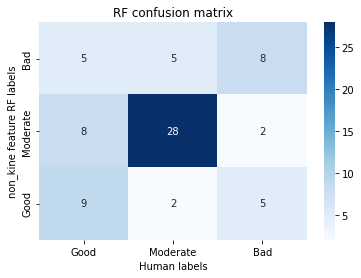

In [577]:
# confusion_matrix(comparison_df['Target'], comparison_df['prediction'], labels = labels)
labels = ["Good", "Moderate", "Bad"]
origin_cm = confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
transform_cm =confusion_matrix(y_test.ravel(), non_kine_RF_best_reg.predict(non_kine_x_test), labels = labels)
transform_cm = [[origin_cm[G_index][B_index], origin_cm[M_index][B_index], origin_cm[B_index][B_index]],
                [origin_cm[G_index][M_index], origin_cm[M_index][M_index], origin_cm[B_index][M_index]],
                [origin_cm[G_index][G_index], origin_cm[M_index][G_index], origin_cm[B_index][G_index]]
               ]
cm = transform_cm
ax= plt.subplot()
sns.heatmap(cm, ax = ax, annot=True, cmap="Blues")
ax.set_xlabel('Human labels')
ax.set_ylabel('non_kine feature RF labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(["Bad", "Moderate", "Good"])
ax.set_title("RF confusion matrix")

In [578]:
### sensitivity
cm = origin_cm
B_index = list(labels).index("Bad")
M_index = list(labels).index("Moderate")
G_index = list(labels).index("Good")
B_predicted_B_rate = cm[B_index][B_index]/sum(cm[B_index][:])*100
M_predicted_M_rate = cm[M_index][M_index]/sum(cm[M_index][:])*100
G_predicted_G_rate = cm[G_index][G_index]/sum(cm[G_index][:])*100
print("non_kine feature RF Sensitivity: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(G_predicted_G_rate, M_predicted_M_rate, B_predicted_B_rate)  )

non_kine feature RF Sensitivity: 
 Good prediction: 40.909090909090914 
 Moderate prediction 80.0 
 Bad prediction 53.333333333333336


In [579]:
PredictedB_is_B_rate = cm[B_index][B_index]/sum(cm[:,B_index])*100
PredictedM_is_M_rate = cm[M_index][M_index]/sum(cm[:,M_index])*100
PredictedG_is_G_rate = cm[G_index][G_index]/sum(cm[:,G_index])*100
print("non_kine feature RF Precision: \n Good prediction: {} \n Moderate prediction {} \n Bad prediction {}".format(PredictedG_is_G_rate, PredictedM_is_M_rate, PredictedB_is_B_rate))


non_kine feature RF Precision: 
 Good prediction: 56.25 
 Moderate prediction 73.68421052631578 
 Bad prediction 44.44444444444444


In [611]:
(57.9, 55.3, 54.3).set()

AttributeError: 'tuple' object has no attribute 'set'

In [612]:
def y():
    a = b

In [613]:
y

<function __main__.y()>

In [614]:
len([1,2,3])//2

1

In [616]:
(1,"1")

(1, '1')

In [376]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import metrics

In [377]:
onehot_targets = onehotencoder.transform(y_test.reshape(-1, 1)).toarray()
targets_bad = onehot_targets[:,0]

In [598]:
all_predictions = all_RF_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_RF_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_RF_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_RF_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_RF_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_RF_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_RF_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_RF_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_RF_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [599]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [600]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'RF')

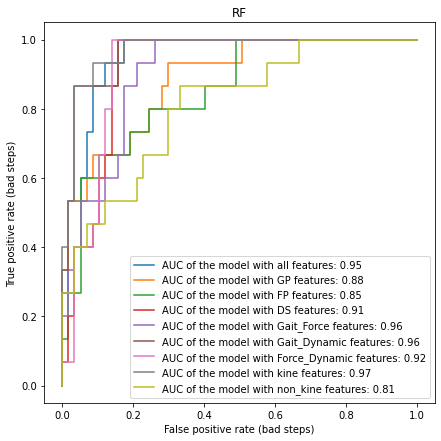

In [601]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with GP features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with Gait_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with Gait_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("RF")

In [602]:
all_predictions = all_DT_best_reg.predict_proba(all_x_test)
all_predictions_bad = all_predictions[:,0]

spa_predictions = spa_DT_best_reg.predict_proba(spa_x_test)
spa_predictions_bad = spa_predictions[:,0]

cop_predictions = COP_DT_best_reg.predict_proba(cop_x_test)
cop_predictions_bad = cop_predictions[:,0]

adv_predictions = adv_DT_best_reg.predict_proba(adv_x_test)
adv_predictions_bad = adv_predictions[:,0]

spa_cop_predictions = spa_cop_DT_best_reg.predict_proba(spa_cop_x_test)
spa_cop_predictions_bad = spa_cop_predictions[:,0]

spa_adv_predictions = spa_adv_DT_best_reg.predict_proba(spa_adv_x_test)
spa_adv_predictions_bad = spa_adv_predictions[:,0]

cop_adv_predictions = cop_adv_DT_best_reg.predict_proba(cop_adv_x_test)
cop_adv_predictions_bad = cop_adv_predictions[:,0]

kine_predictions = kine_DT_best_reg.predict_proba(kine_x_test)
kine_predictions_bad = kine_predictions[:,0]

non_kine_predictions = non_kine_DT_best_reg.predict_proba(non_kine_x_test)
non_kine_predictions_bad = non_kine_predictions[:,0]

In [603]:
all_fpr, all_tpr, all_thresholds = roc_curve(targets_bad, all_predictions_bad)
spa_fpr, spa_tpr, spa_thresholds = roc_curve(targets_bad, spa_predictions_bad)
cop_fpr, cop_tpr, cop_thresholds = roc_curve(targets_bad, cop_predictions_bad)
adv_fpr, adv_tpr, adv_thresholds = roc_curve(targets_bad, adv_predictions_bad)
spa_cop_fpr, spa_cop_tpr, spa_cop_thresholds = roc_curve(targets_bad, spa_cop_predictions_bad)
spa_adv_fpr, spa_adv_tpr, spa_adv_thresholds = roc_curve(targets_bad, spa_adv_predictions_bad)
cop_adv_fpr, cop_adv_tpr, cop_adv_thresholds = roc_curve(targets_bad, cop_adv_predictions_bad)
kine_fpr, kine_tpr, kine_thresholds = roc_curve(targets_bad, kine_predictions_bad)
non_kine_fpr, non_kine_tpr, non_kine_thresholds = roc_curve(targets_bad, non_kine_predictions_bad)

In [604]:
all_auc = metrics.auc(all_fpr, all_tpr)
spa_auc = metrics.auc(spa_fpr, spa_tpr)
cop_auc = metrics.auc(cop_fpr, cop_tpr)
adv_auc = metrics.auc(adv_fpr, adv_tpr)
spa_cop_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
spa_adv_auc = metrics.auc(spa_adv_fpr, spa_adv_tpr)
cop_adv_auc = metrics.auc(cop_adv_fpr, cop_adv_tpr)
kine_auc = metrics.auc(kine_fpr, kine_tpr)
non_kine_auc = metrics.auc(non_kine_fpr, non_kine_tpr)

Text(0.5, 1.0, 'DT')

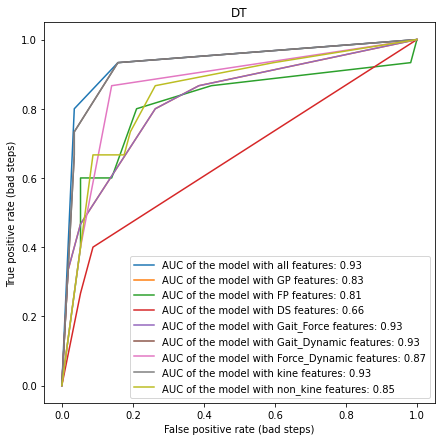

In [605]:
all_label = "AUC of the model with all features: " + str(round(all_auc, 2))
spa_label = "AUC of the model with GP features: " + str(round(spa_auc, 2))
cop_label = "AUC of the model with FP features: " + str(round(cop_auc, 2))
adv_label = "AUC of the model with DS features: " + str(round(adv_auc, 2))
spa_cop_label = "AUC of the model with Gait_Force features: " + str(round(spa_cop_auc, 2))
spa_adv_label = "AUC of the model with Gait_Dynamic features: " + str(round(spa_adv_auc, 2))
cop_adv_label = "AUC of the model with Force_Dynamic features: " + str(round(cop_adv_auc, 2))
kine_label = "AUC of the model with kine features: " + str(round(kine_auc, 2))
non_kine_label = "AUC of the model with non_kine features: " + str(round(non_kine_auc, 2))

figure = plt.figure(figsize = (7,7))
plt.plot(all_fpr,all_tpr,  label = all_label)
plt.plot(spa_fpr,spa_tpr,  label = spa_label)
plt.plot(cop_fpr,cop_tpr,  label = cop_label)
plt.plot(adv_fpr,adv_tpr,  label = adv_label)
plt.plot(spa_cop_fpr,spa_cop_tpr,  label = spa_cop_label)
plt.plot(spa_adv_fpr,spa_adv_tpr,  label = spa_adv_label)
plt.plot(cop_adv_fpr,cop_adv_tpr,  label = cop_adv_label)
plt.plot(kine_fpr,kine_tpr,  label = kine_label)
plt.plot(non_kine_fpr,non_kine_tpr,  label = non_kine_label)


plt.legend(loc = "lower right")
plt.xlabel("False positive rate (bad steps)")
plt.ylabel("True positive rate (bad steps)")
plt.title("DT")

In [606]:
all_RF_best_reg.feature_importances_

array([0.04984801, 0.00459729, 0.04836568, 0.00765964, 0.00424386,
       0.0348543 , 0.00735737, 0.00192455, 0.02525705, 0.03584145,
       0.06540746, 0.00615832, 0.00844796, 0.07714362, 0.01456211,
       0.02582996, 0.00814493, 0.00473154, 0.00655206, 0.00176553,
       0.00788776, 0.00401513, 0.01494491, 0.01214835, 0.03521064,
       0.09830987, 0.1128507 , 0.09379615, 0.00700218, 0.00366021,
       0.00798109, 0.01441462, 0.04536486, 0.04926188, 0.01739134,
       0.00325813, 0.01063794, 0.00510671, 0.00319508, 0.01049705,
       0.00437271])

In [607]:
all_DT_best_reg.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0402258 ,
       0.09856725, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19578282, 0.        ,
       0.06722375, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45144782, 0.        , 0.02400313, 0.        ,
       0.0267964 , 0.        , 0.        , 0.        , 0.        ,
       0.03520505, 0.        , 0.        , 0.        , 0.        ,
       0.06074797])